# EDA Case Study

* ***The clients with payment difficulties represented with “Defaulters”***
* ***All other cases represented as “Re-payers” or “Non-Defaulters”***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_info_columns', 500)
pd.set_option('max_info_rows', 500)

In [3]:
data = pd.read_csv('application_data.csv') # load application data

In [4]:
# checking missing values percentage
data_missing_list = (data.isnull().sum()/len(data.index)*100).round(2)

In [5]:
# Consider only 15% missing values list 
data_missing_data_fil_list = data_missing_list<15

In [6]:
# remove all columns having missing data more than 15%
data_Fil = data.loc[:,data_missing_data_fil_list] 

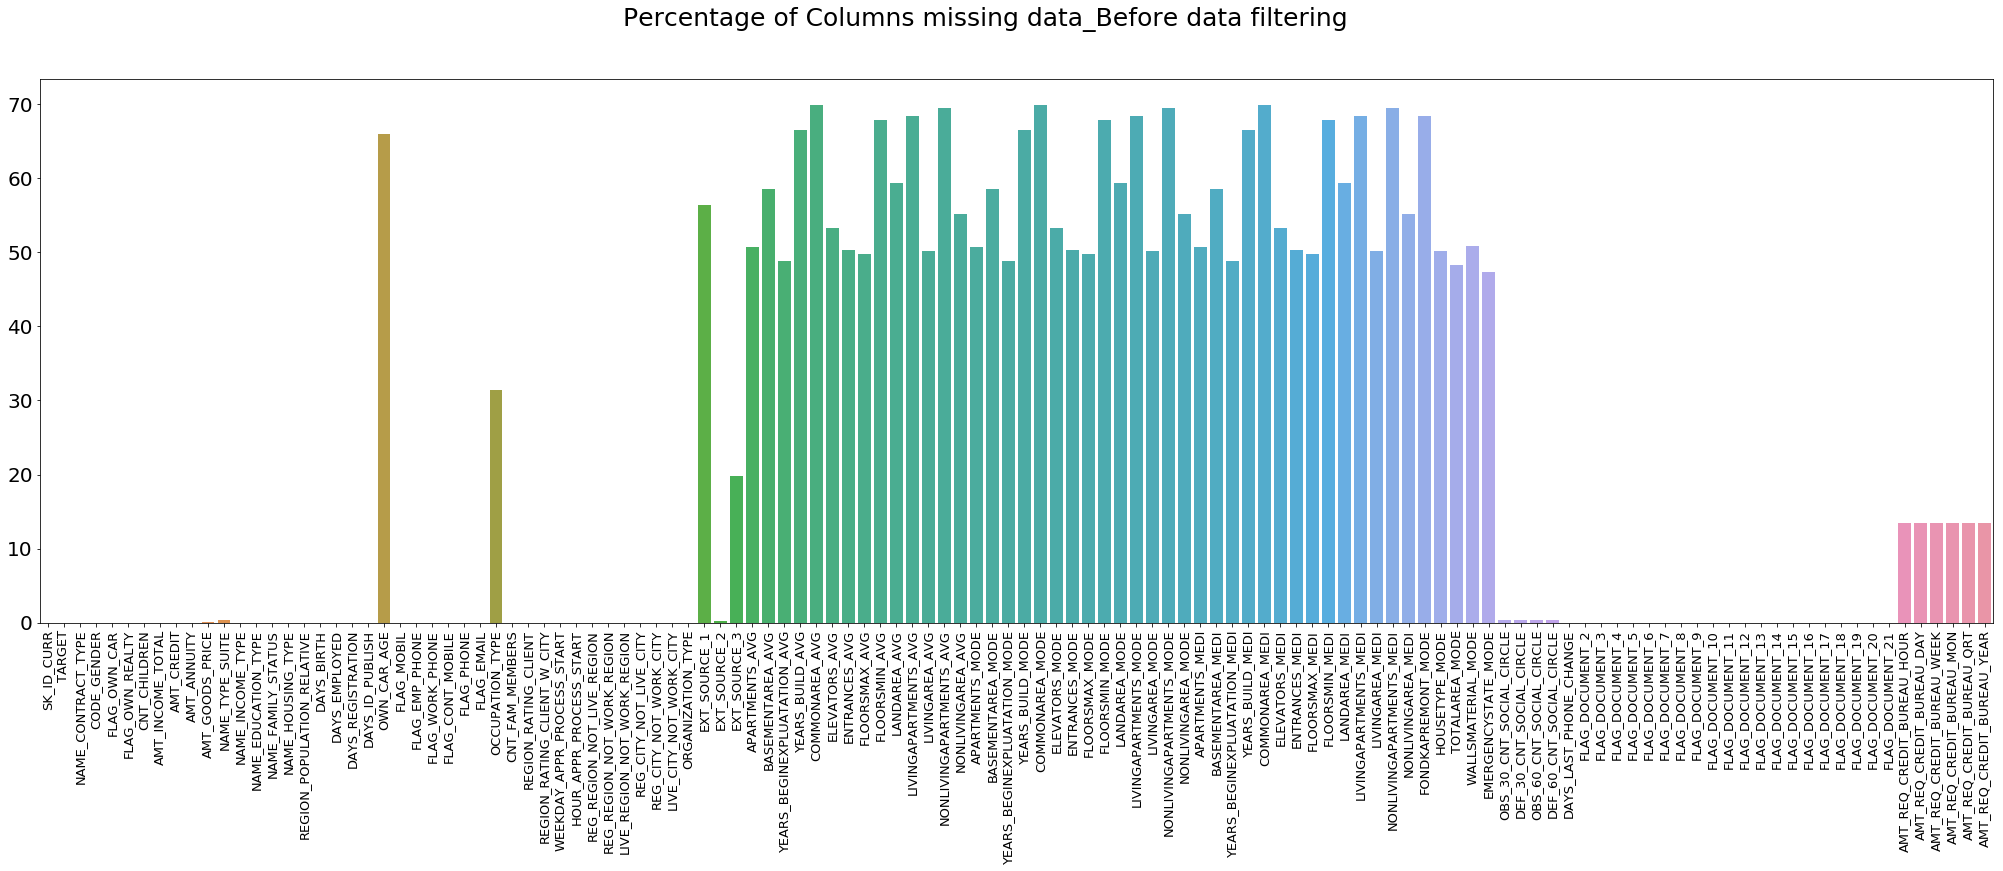

In [7]:
# plot the original data set missing values percentage 
plt.figure(figsize = (35,10))
fig = sns.barplot(x = data_missing_list.index, y = data_missing_list.values)
plt.xticks(rotation=90)
plt.suptitle('Percentage of Columns missing data_Before data filtering', fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.show()

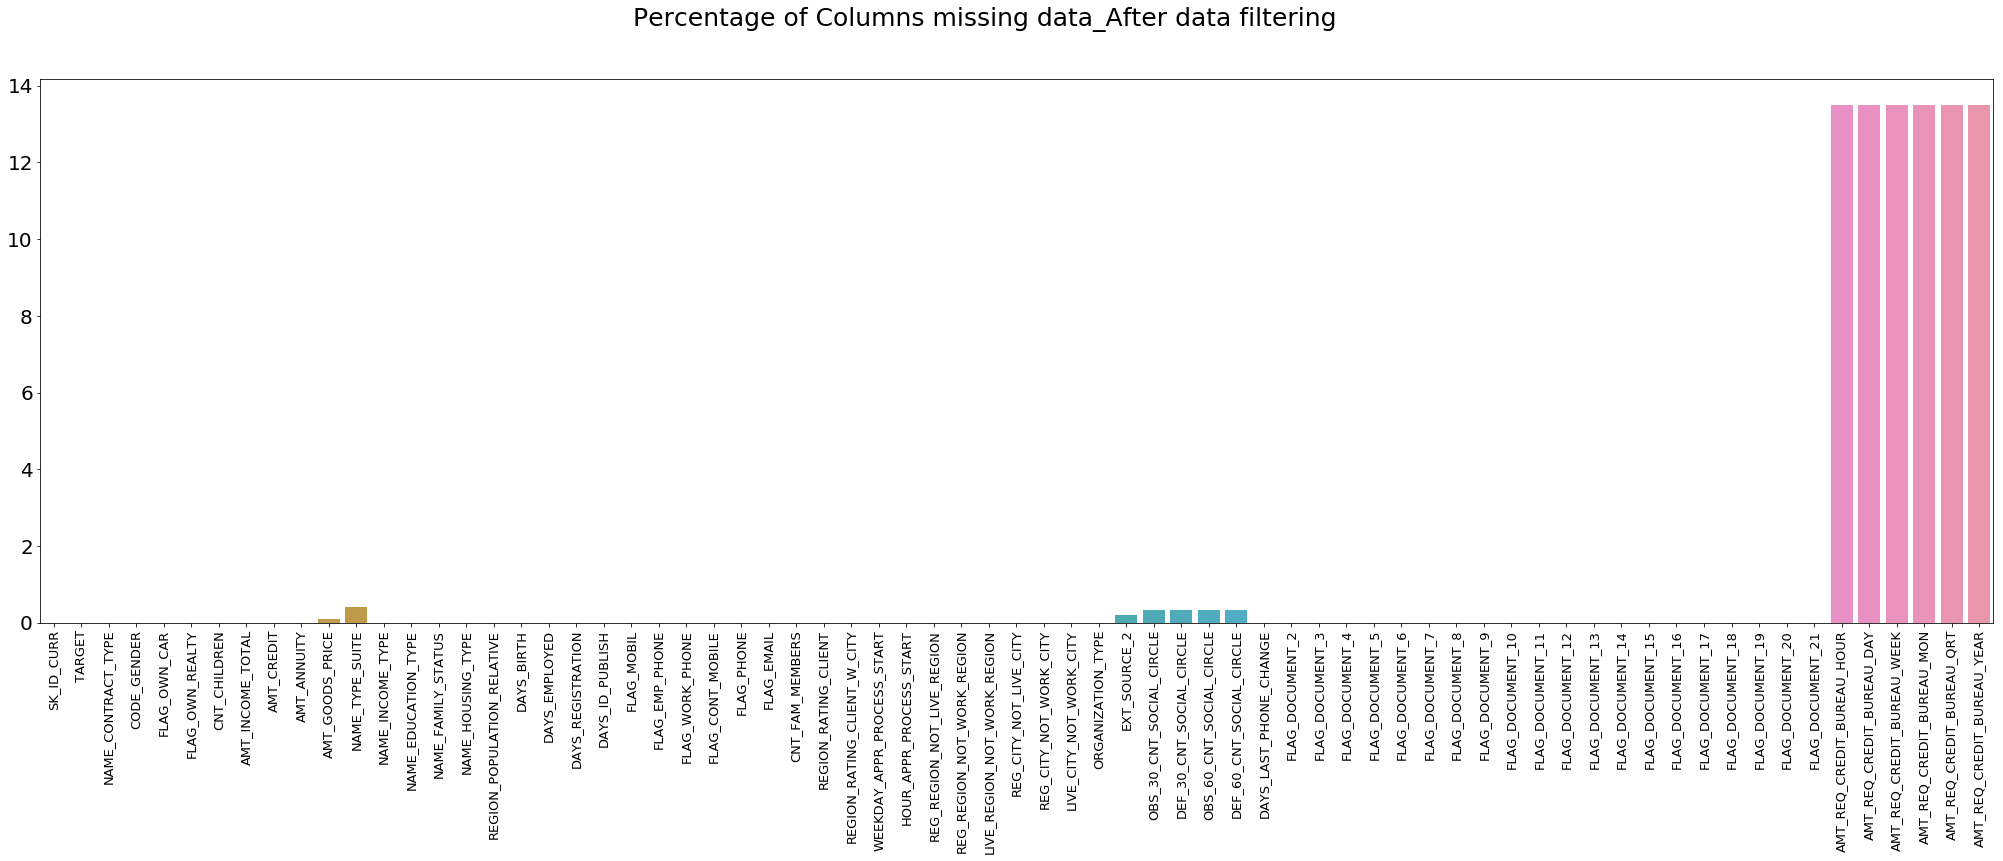

In [8]:
# checking missing values percentage after data filter with the limits of 15% data missing 
data_Fil_missing_list = (data_Fil.isnull().sum()/len(data_Fil.index)*100).round(2)

# plot the data of missing values after filter the data with %15 missing values
plt.figure(figsize = (35,10))
fig = sns.barplot(x = data_Fil_missing_list.index, y = data_Fil_missing_list.values)
plt.xticks(rotation=90)
plt.suptitle('Percentage of Columns missing data_After data filtering', fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.show()

In [9]:
len(data_Fil.columns)

71

In [10]:
# listing all missing columns
missing_list_handling = data_Fil_missing_list>0.0

# create new data frame to check missing values in detail.
data_Fil_check = data_Fil.loc[:,missing_list_handling]
(data_Fil_check.isnull().sum()/len(data_Fil_check.index)*100).round(2)

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [11]:
# create the list of some missing data columns to check for the possibility of imputing 
list_of_REQ_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR',
                       'AMT_REQ_CREDIT_BUREAU_DAY', 
                       'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_MON', 
                       'AMT_REQ_CREDIT_BUREAU_QRT', 
                       'AMT_REQ_CREDIT_BUREAU_YEAR',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                       'DEF_60_CNT_SOCIAL_CIRCLE']

In [12]:
# describe the columns to check insights of each column data
data_Fil_check[list_of_REQ_columns].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count              265992.000000               265992.000000   
mean                    0.265474                    1.899974   
std                     0.794056                    1.869295   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    1.000000   
75%                     0.000000                    3.000000   
max                   261.000000                   25.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [13]:
# after checking above selective columns, 
# it is ok with replace null values with 0 as that is median of the columns except one colums
for col in list_of_REQ_columns:
    data_Fil[col].fillna(0, inplace = True)

In [14]:
# removed all null values , since remaining is missing values contribution very less in percentage.
data_Fil.dropna(how = 'any', inplace = True) 

In [15]:
#Checking 'XNA' from CODE Gender_ found only 4 items, it will be ok even with out this items for our analysis.
data_Fil['CODE_GENDER'].loc[data_Fil['CODE_GENDER']=='XNA']

35657     XNA
38566     XNA
83382     XNA
189640    XNA
Name: CODE_GENDER, dtype: object

In [16]:
#Delete 'XNA' from GENDER column
data_Fil = data_Fil[~data_Fil.CODE_GENDER.str.contains('XNA')]

In [17]:
print('Application dataset shape, Before filtering missing value : ', data.shape)
print('Application dataset shape, After filtering missing value : ', data_Fil.shape)

Application dataset shape, Before filtering missing value :  (307511, 122)
Application dataset shape, After filtering missing value :  (305544, 71)


In [18]:
data_Fil.isnull().sum(axis=1).max()

0

In [19]:
data_Fil.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [20]:
data_Fil_Def = data_Fil.loc[data_Fil['TARGET']==1] # defaulters
data_Fil_Non_Def = data_Fil.loc[data_Fil['TARGET']==0] # re-payers

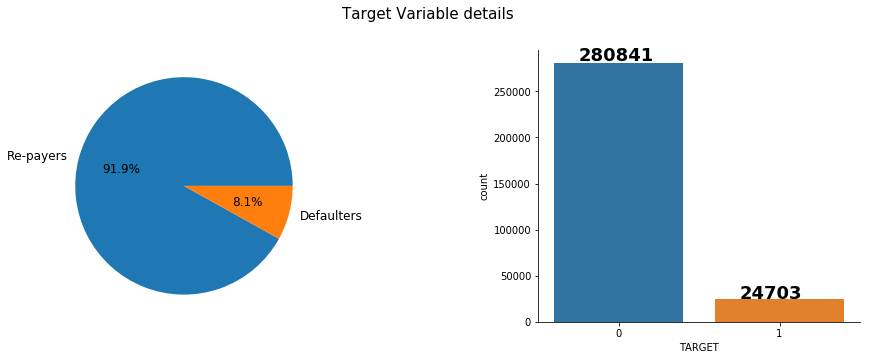

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
fig.suptitle('Target Variable details',fontsize=15, y=1.0)
ax = axes[0]
ax.pie(data_Fil['TARGET'].value_counts(), labels= ['Re-payers', 'Defaulters'], 
       autopct = '%1.1f%%',textprops={'size': 'large'}) 

fig1 = sns.countplot(x = 'TARGET', data = data_Fil)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in fig1.patches:
    
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    fig1.annotate('{:.0f}'.format(height), (x+0.15, y + height*1.01),fontsize=18,weight='bold')
fig.subplots_adjust(wspace=0.6)
plt.show()

## Distribution of Target variable :
#### Defaulters contribution is ~8% and re-payers contribution is ~92%
* **Ratio between Re-payers Vs Defaulters is 23:2**

In [22]:
# function to create annotation on the each bar in the bar plot
def Perc_annotation(fig,font_size,En_perc):
    for p in fig.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if En_perc == 1:
            fig.annotate('{:.0f}%'.format(height), (x+0.00, y + height + .5),fontsize=font_size)
        else:
            fig.annotate('{:.0f}'.format(height), (x+0.00, y + height + .5),fontsize=font_size)

In [23]:
# pre-defined function for more than 3 category columns to make univeriate analysis.
# n_col_plots--> number of subplot columns
# len_col_lst --> must be more than 3 
# fig_size --> possibility to adjust with respect to number columns you want to plot. for better visualisation
# pie_size --> possibility to adjust pie plot radius to make better visualisation
# Output will be pie plot if column having <4 unique items else output will be bar plot
# annote_size = annotation fort size
#subplt_w,subplt_h --> sub plot width and height adjust parameters
# En_pie --> True / False ===> True = En_pie plot if the unique items in a column is less than 4 number 
# x_angle --> xtickts rotation angle 

def Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle):
    
    colors_pie = ['#FF8033','#97FF33','#33C9FF', '#EFEE0A']  # color code for each sector
    num_plot = len_col_lst
    
    n_col_SubPlot = int(n_col_plots)
    n_row_SubPlot = int(num_plot/n_col_SubPlot)
    if (len_col_lst > 3) and (num_plot%n_col_plots == 0):
        n_row_SubPlot = int(num_plot/n_col_SubPlot)
    else:
        n_row_SubPlot = int((num_plot/n_col_SubPlot)+1)
        
    fig, axes = plt.subplots(n_row_SubPlot,n_col_SubPlot,figsize=fig_size)
    for i in range(len_col_lst):
        x = df1.columns[i]
        temp_df = df1.groupby(x).count().iloc[:,0]
        temp_df = temp_df.sort_values(ascending = False)
        total_sum = temp_df.values.sum()
        temp = temp_df.apply(lambda row: round((row/total_sum)*100,1)).reset_index()
        temp.columns = [x,'Percentage']
        
        ax = axes[i // n_col_SubPlot, i % n_col_SubPlot]   # subplot axis - rows and column calculation
        if ((len(temp[x])< 4) and (En_pie)):            
            ax.pie(temp.values[:,1], labels=temp.values[:,0],startangle=90, autopct = '%1.1f%%',
                   textprops={'size': 'large'},colors=colors_pie,radius=pie_size)
        else:
            fig1 = sns.barplot(x = x ,y = 'Percentage', data = temp, ax = ax)
            sns.despine(top=True, right=True, left=False, bottom=False)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=x_angle)
            Perc_annotation(fig1,annot_size,1)
        
        ax.set_title('Percentage contribution of '+x,fontsize=12,x =0.5, y=1.15,weight='bold')

    fig.subplots_adjust(wspace= subplt_w,hspace= subplt_h) # adjsut spaces between subplots width and height
    plt.show()

In [24]:
#Single Categorical variable Univeriate or segmented analysis 
# other than x,y, there is a possibility to enable annotation
# En_annotation = 1 --> will show values at the top of the each bar.
# ticks_size = x, y lable and ticks font size
# title_size --> font size
# annote_size = annotation fort size
# En_perc_calc_y --> enables the percentage calculation for categorical (y ==> became percentage values column) 

def Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y):
    
    if En_perc_calc_y==1:
        temp_df = df1.groupby(x).count().iloc[:,0]
        temp_df = temp_df.sort_values(ascending = False)
        total_sum = temp_df.values.sum()
        temp = temp_df.apply(lambda row: round((row/total_sum)*100,1)).reset_index()
        temp.rename(columns={ temp.columns[0]: x, temp.columns[1]: y }, inplace = True)
    else:
        temp = df1.copy()
    
    fig = plt.figure(figsize=fig_size)  # create plot side and specifying subplots rows & columns.
    
    fig1 = sns.barplot(x = x,y = y, data = temp)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=ticks_size)
    plt.yticks(fontsize=ticks_size)
    plt.xlabel(x,fontsize=ticks_size)
    plt.ylabel(y,fontsize=ticks_size)
    if En_annotation==1:
        Perc_annotation(fig1,annot_size,En_perc_calc_y)
    
    fig.suptitle(y+' contribution of '+x,fontsize=title_size,x =0.5, y=1.0,weight='bold')

    plt.show()

In [25]:
# split the data frame into two parts Categories and numerical

data_Fil_cat = data_Fil.select_dtypes(include=['object'])
data_Fil_num = data_Fil.select_dtypes(exclude=['object'])

In [26]:
#list of Categorical columns
data_Fil_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

# Univariate analysis 

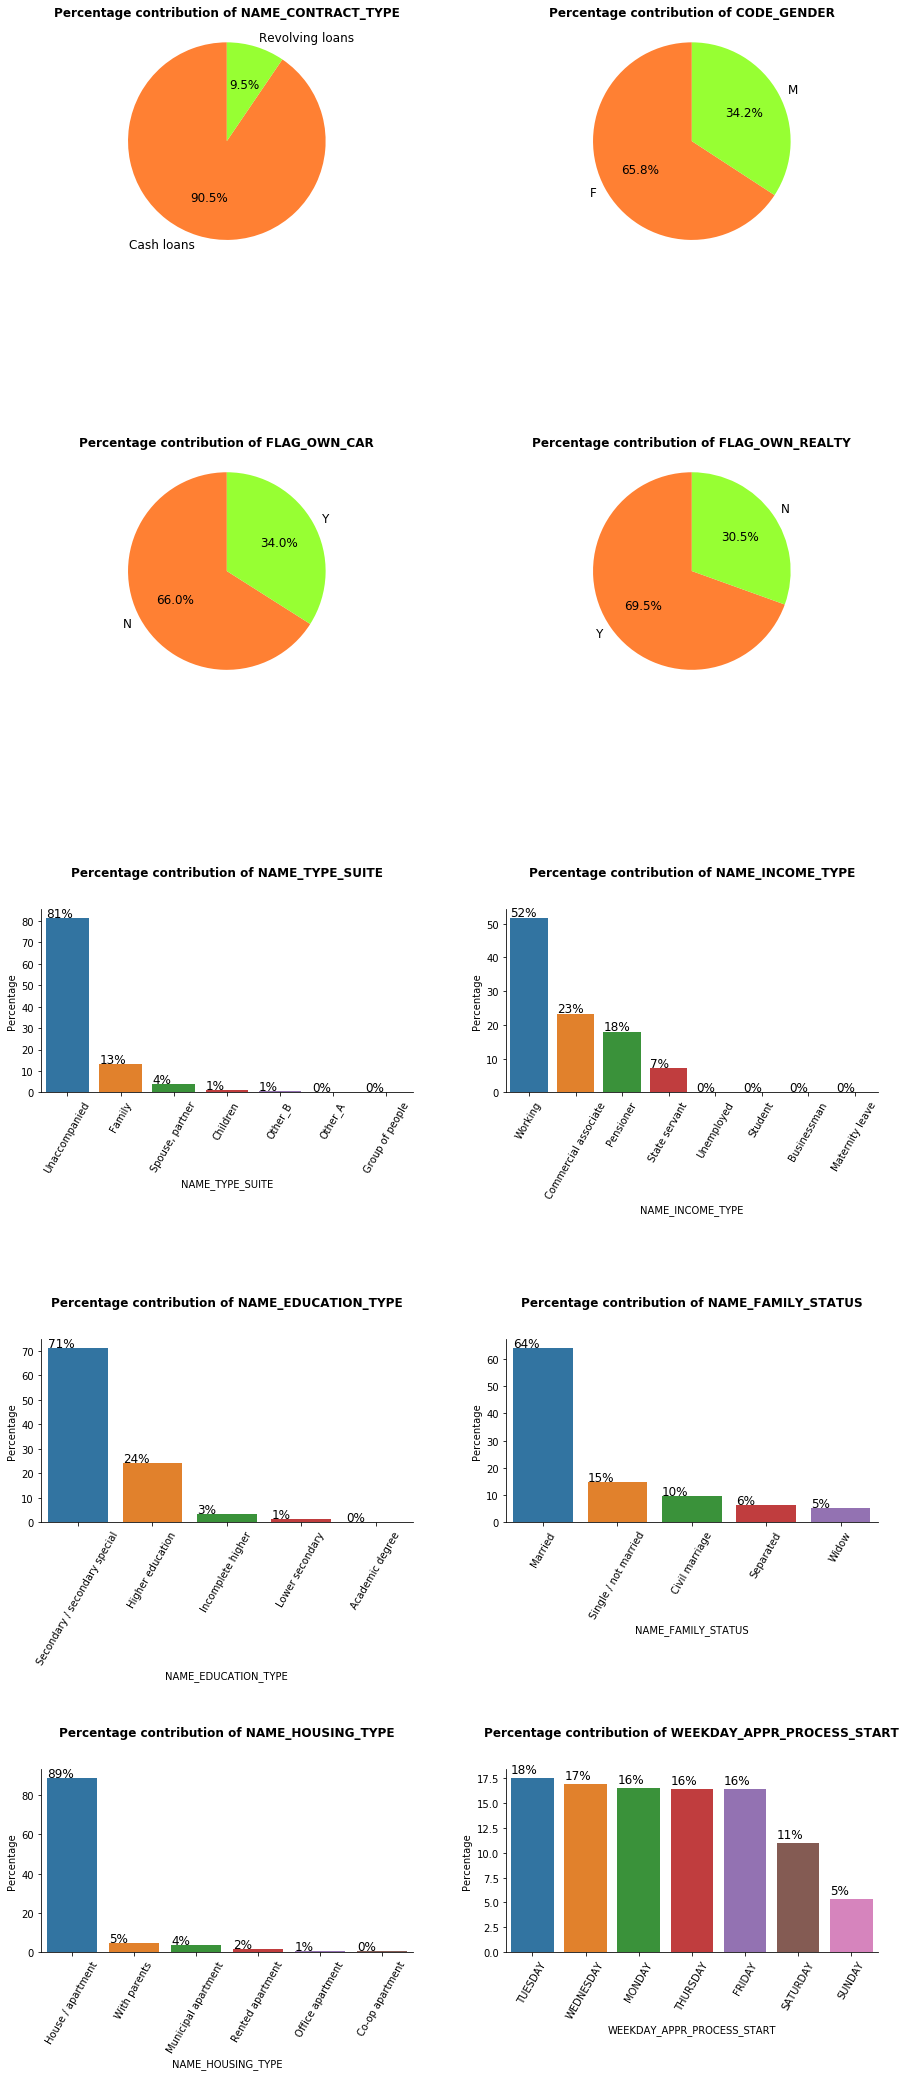

In [27]:
# pre-defined function --> Uni_Categorical_bar_pie_plot

n_col_plots =2
df1 = data_Fil_cat

# except last column(will be ploted separately) all columns from the list, will be plotted.
len_col_lst = len(data_Fil_cat.columns)-1 
fig_size = (15,35)
pie_size = 1.35
annot_size = 12
subplt_w = 0.25
subplt_h = 1.35
En_pie = True
x_angle = 60
# Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)
Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)

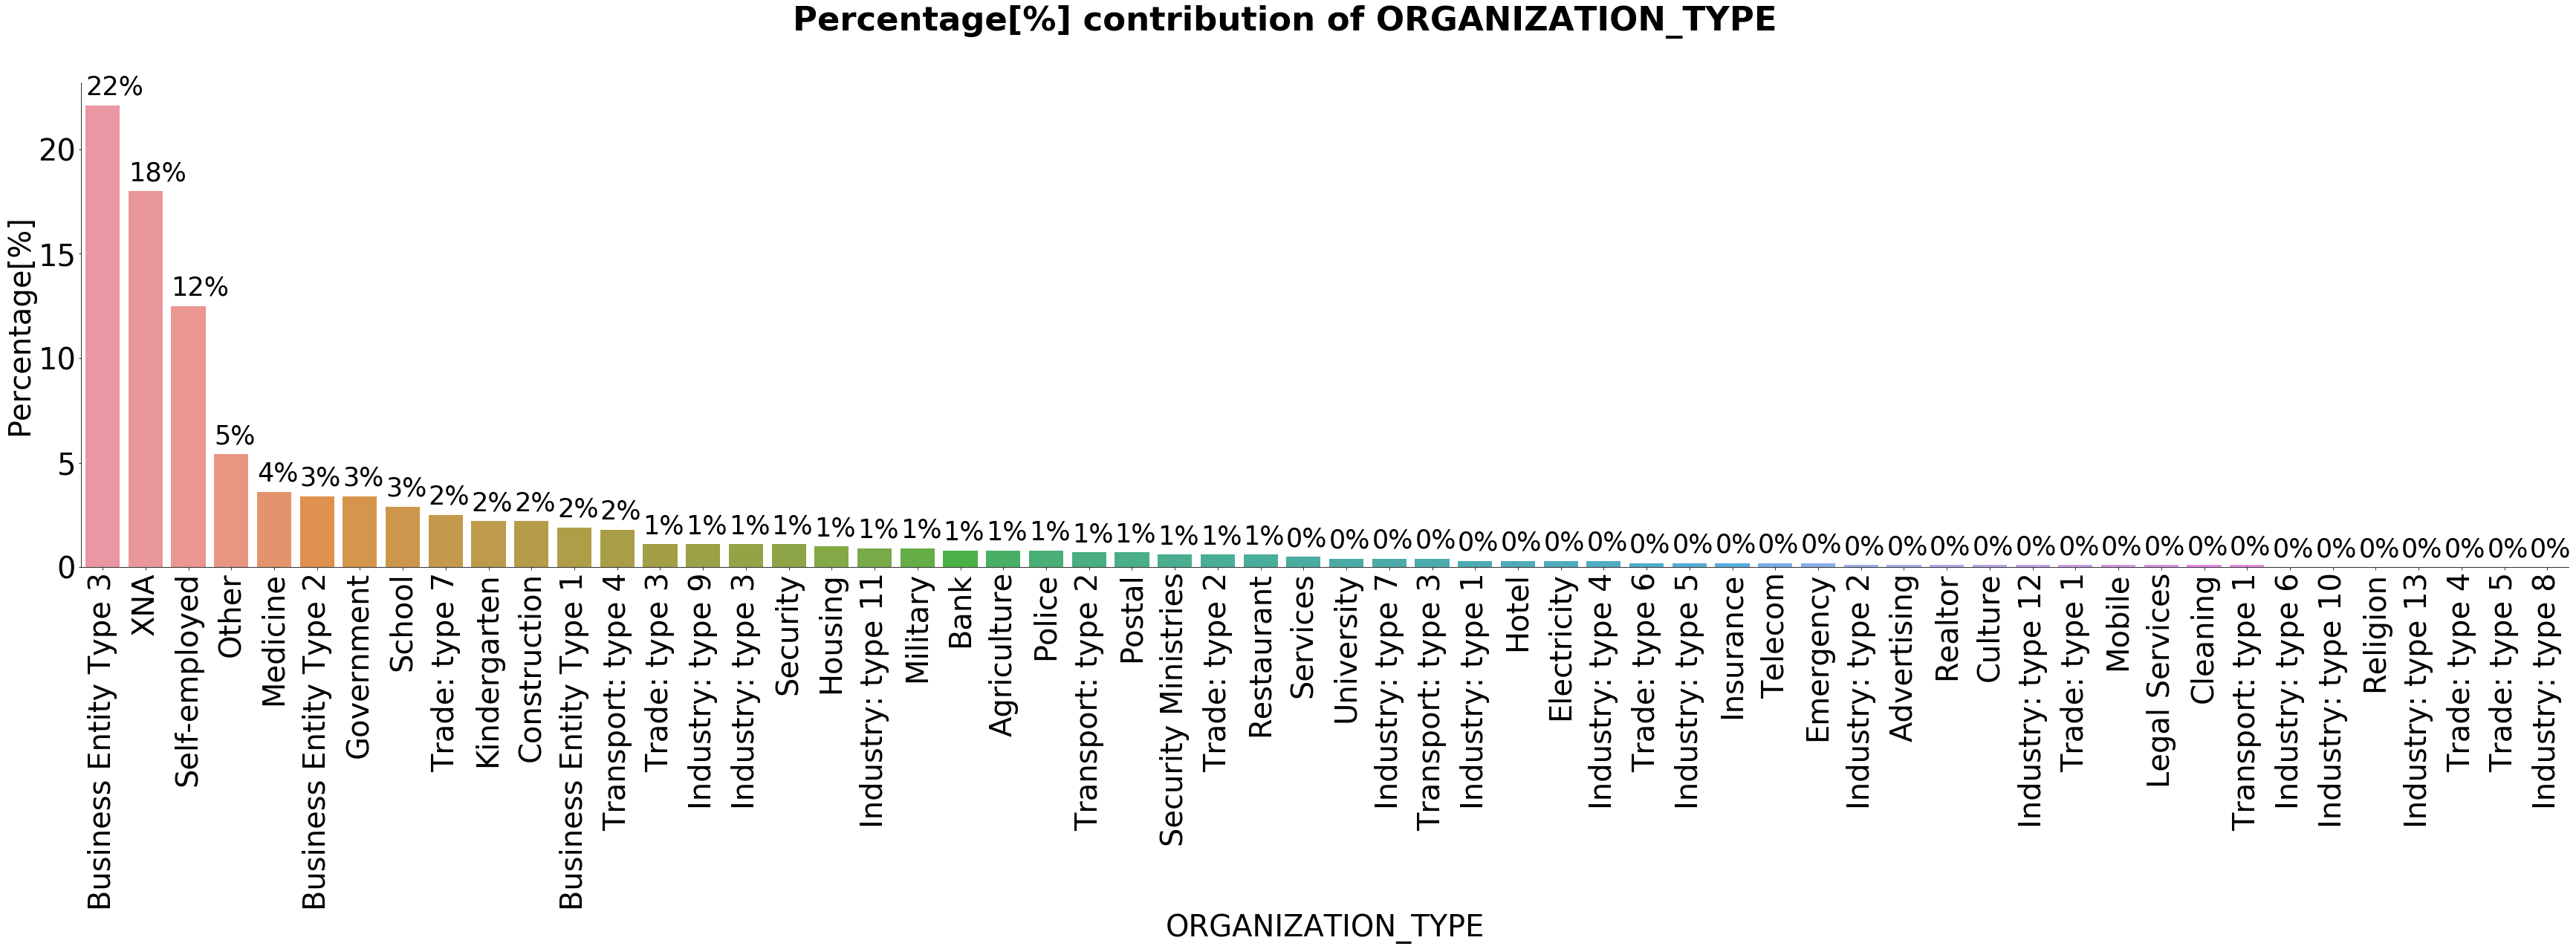

In [28]:
# Univariate analysis for 'ORGANIZATION_TYPE' column
# pre- defined function for Single Categorical variable to make Univeriate analysis
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)

Single_Categorical_data_bar(data_Fil_cat,'ORGANIZATION_TYPE','Percentage[%]',1,(60,12),40,45,35,1)

In [29]:
#filter outliers
def filter_OutLiers(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df.loc[~((df[column_name] < (Q1 - 1.5 * IQR)) | 
                                      (df[column_name] > (Q3 + 1.5 * IQR)))]
    
    return(df)

In [30]:
Amount_col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
data_Fil[Amount_col_list].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.055440e+05  3.055440e+05  305544.000000     3.055440e+05
mean       1.688323e+05  5.990828e+05   27131.976627     5.382206e+05
std        2.377489e+05  4.020910e+05   14494.951214     3.690449e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16564.500000     2.385000e+05
50%        1.485000e+05  5.146020e+05   24939.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34624.125000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06

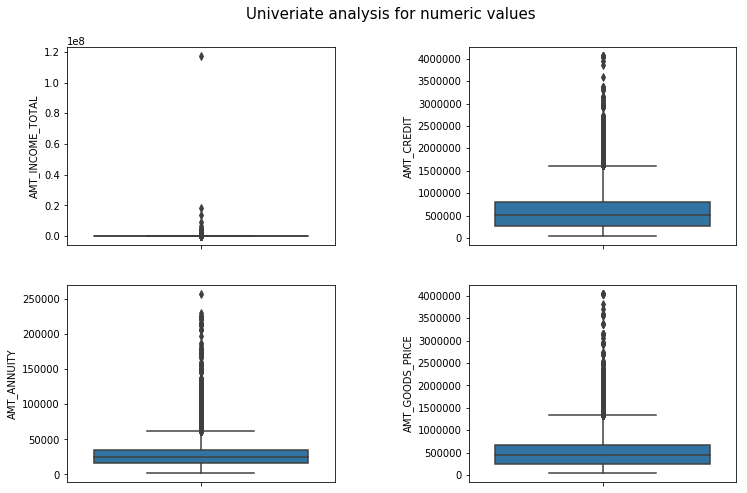

In [31]:
# Univariate analysis on 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' using box plot
fig, axes = plt.subplots(2,2, figsize= (12,8))
count = 0
for i in data_Fil[Amount_col_list].columns:
    ax = axes[count//2, count%2]
    sns.boxplot(y = i, data = data_Fil, ax = ax)
    count+=1
fig.suptitle('Univeriate analysis for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjust spaces between subplots width and height  

* **All box plots having outliers, so during further analysis median values for comparison makes sense than mean.**

AMT_INCOME_TOTAL_Percentage of filtered out data :  4.56
AMT_CREDIT_Percentage of filtered out data :  2.12
AMT_ANNUITY_Percentage of filtered out data :  2.44
AMT_GOODS_PRICE_Percentage of filtered out data :  4.78


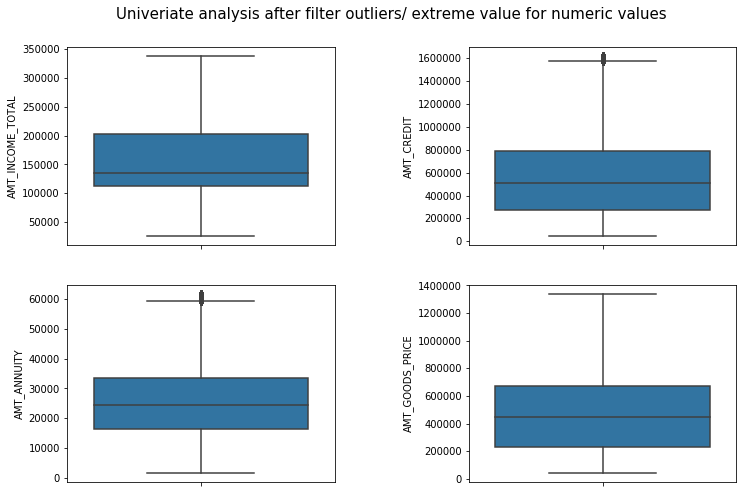

In [32]:
# Univariate analysis after removing outliers / extrem values not from the main data frame but for 
# only checking distribution of values 

fig, axes = plt.subplots(2,2, figsize= (12,8))
count = 0
for i in data_Fil[Amount_col_list].columns:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//2, count%2]
    sns.boxplot(y = i, data = df, ax = ax)
    count+=1
    print(i+'_Percentage of filtered out data : ',round((1-(len(df.index)/len(data_Fil.index)))*100,2))
fig.suptitle('Univeriate analysis after filter outliers/ extreme value for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjust spaces between subplots width and height  

* **Maximum percentage of outliers for these 4 columns is less than 5%** 

In [33]:
data_Fil_col_list = data_Fil.columns
list_of_days_col = [s for s in data_Fil_col_list if 'DAYS' in s]
list_of_days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [34]:
data_Fil[list_of_days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  305544.000000  305544.000000      305544.000000    305544.000000   
mean   -16039.584413   63817.588763       -4986.754824     -2994.432939   
std      4362.286069  141279.598207        3521.765453      1509.546579   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2762.000000       -7479.000000     -4299.000000   
50%    -15755.000000   -1214.000000       -4505.500000     -3255.000000   
75%    -12418.000000    -290.000000       -2012.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           305544.000000  
mean              -964.721274  
std                826.769785  
min              -4292.000000  
25%              -1571.000000  
50%               -759.000000  
75%               -276.000000  
max                  0.000000

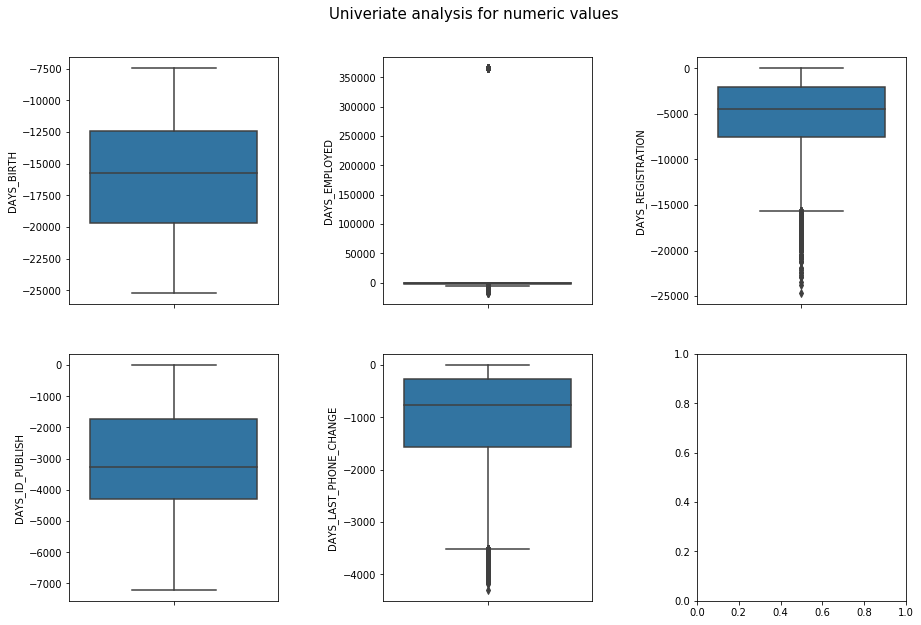

In [35]:
# Univariate analysis on DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE using box plot
fig, axes = plt.subplots(2,3, figsize= (15,10))
count = 0
for i in data_Fil[list_of_days_col].columns:
    ax = axes[count//3, count%3]
    sns.boxplot(y = i, data = data_Fil, ax = ax)
    count+=1

fig.suptitle('Univeriate analysis for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjust spaces between subplots width and height  

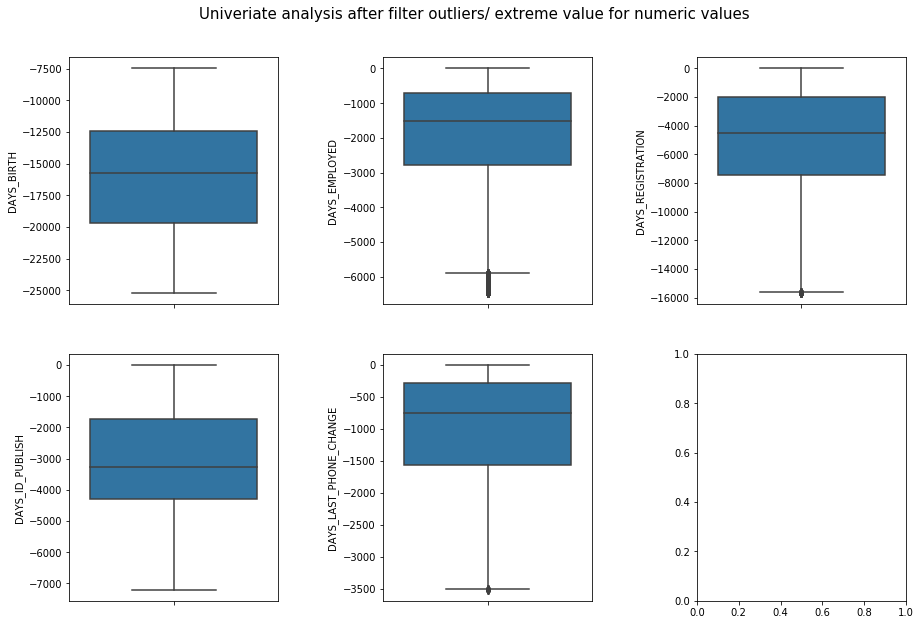

In [36]:
# Univariate analysis after removing outliers / extrem values 
# from DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE using box plot

fig, axes = plt.subplots(2,3, figsize= (15,10))
count = 0
for i in data_Fil[list_of_days_col].columns:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//3, count%3]
    sns.boxplot(y = i, data = df, ax = ax)
    count+=1

fig.suptitle('Univeriate analysis after filter outliers/ extreme value for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjust spaces between subplots width and height  

* **"DAYS_BIRTH" --> can create ordered categorical based on this column. Distribution of data samples are good.**  
* **'DAYS_EMPLOYED' --> There are some unrealistic/ extreme values noticed. Column describe () details are showing above. There are some values set to '365243' number. when we convert to years this turns to ~1000 years. it seems these are some NaN values. this columns also possible to make categorical and impute 1000 years as 'XNA'**
* **'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'--> Can be created ordered categorical**

In [37]:
data_Fil[list_of_days_col] = abs(data_Fil[list_of_days_col])
data_Fil[list_of_days_col] = (data_Fil[list_of_days_col]/365).round(0)
data_Fil[list_of_days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  305544.000000  305544.000000      305544.000000    305544.000000   
mean       43.945792     185.621960          13.661194         8.199182   
std        11.959340     382.172945           9.656297         4.151757   
min        21.000000       0.000000           0.000000         0.000000   
25%        34.000000       3.000000           6.000000         5.000000   
50%        43.000000       6.000000          12.000000         9.000000   
75%        54.000000      16.000000          20.000000        12.000000   
max        69.000000    1001.000000          68.000000        20.000000   

       DAYS_LAST_PHONE_CHANGE  
count           305544.000000  
mean                 2.637911  
std                  2.281257  
min                  0.000000  
25%                  1.000000  
50%                  2.000000  
75%                  4.000000  
max                 12.000000

In [38]:
# rename the columns as per the data conversion
data_Fil.rename(columns = {'DAYS_BIRTH' :'YEAR_BIRTH','DAYS_EMPLOYED':'YEAR_EMPLOYED',
                           'DAYS_REGISTRATION':'YEAR_REGISTRATION',
                           'DAYS_ID_PUBLISH':'YEAR_ID_PUBLISH',
                           'DAYS_LAST_PHONE_CHANGE':'YEAR_LAST_PHONE_CHANGE'}, inplace= True)

In [39]:
data_Fil_col_list = data_Fil.columns
list_of_yrs_col = [s for s in data_Fil_col_list if 'YEAR' in s]
list_of_yrs_col

['YEAR_BIRTH',
 'YEAR_EMPLOYED',
 'YEAR_REGISTRATION',
 'YEAR_ID_PUBLISH',
 'YEAR_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [40]:
# Create Ordered categorical variable from 'DAYS_BIRTH' column
data_Fil['AGE_GROUP[YR]'] = pd.cut(data_Fil['YEAR_BIRTH'],bins = [20,35,50,70], labels = ['20-35','35-50','50-70'])

In [41]:
# Create Ordered categorical variable from 'DAYS_EMPLOYED' column.
data_Fil['WORK_EXP[YR]'] = pd.cut(data_Fil['YEAR_EMPLOYED'],bins = [-1,2,5,10,15,20,25,30,1002],
                              labels = ['0-2','2-5','5-10','10-15','15-20','20-25','25-40','XNA'])

In [42]:
# Create Ordered categorical variable from 'DAYS_REGISTRATION' column.
data_Fil['LATEST_REGISTRATION_UPDATE[YR]'] = pd.cut(data_Fil['YEAR_REGISTRATION'],bins = [-1,2,10,20,30,70],
                                                   labels = ['0-2','2-10','10-20','20-30','30-70'])

In [43]:
# Create Ordered categorical variable from 'DAYS_ID_PUBLISH' column.
data_Fil['LATEST_ID_UPDATE[YR]'] = pd.cut(data_Fil['YEAR_ID_PUBLISH'],bins = [-1,1,5,10,15,25],
                                                   labels = ['0-1','1-5','5-10','10-15','15-25'])

In [44]:
# Create Ordered categorical variable from 'DAYS_LAST_PHONE_CHANGE' column.
data_Fil['LAST_PHONE_CHANGE[YR]'] = pd.cut(data_Fil['YEAR_LAST_PHONE_CHANGE'],bins = [-1,1,2,4,6,8,15],
                                                   labels = ['0-1','1-2','2-4','4-6','6-8','8-15'])

In [45]:
cat_col_list_1 = ['LAST_PHONE_CHANGE[YR]',
                  'LATEST_ID_UPDATE[YR]',
                  'LATEST_REGISTRATION_UPDATE[YR]',
                  'WORK_EXP[YR]',
                  'AGE_GROUP[YR]']

In [46]:
# check if there is any missing values in the new categorical columns
data_Fil[cat_col_list_1].isnull().sum()

LAST_PHONE_CHANGE[YR]             0
LATEST_ID_UPDATE[YR]              0
LATEST_REGISTRATION_UPDATE[YR]    0
WORK_EXP[YR]                      0
AGE_GROUP[YR]                     0
dtype: int64

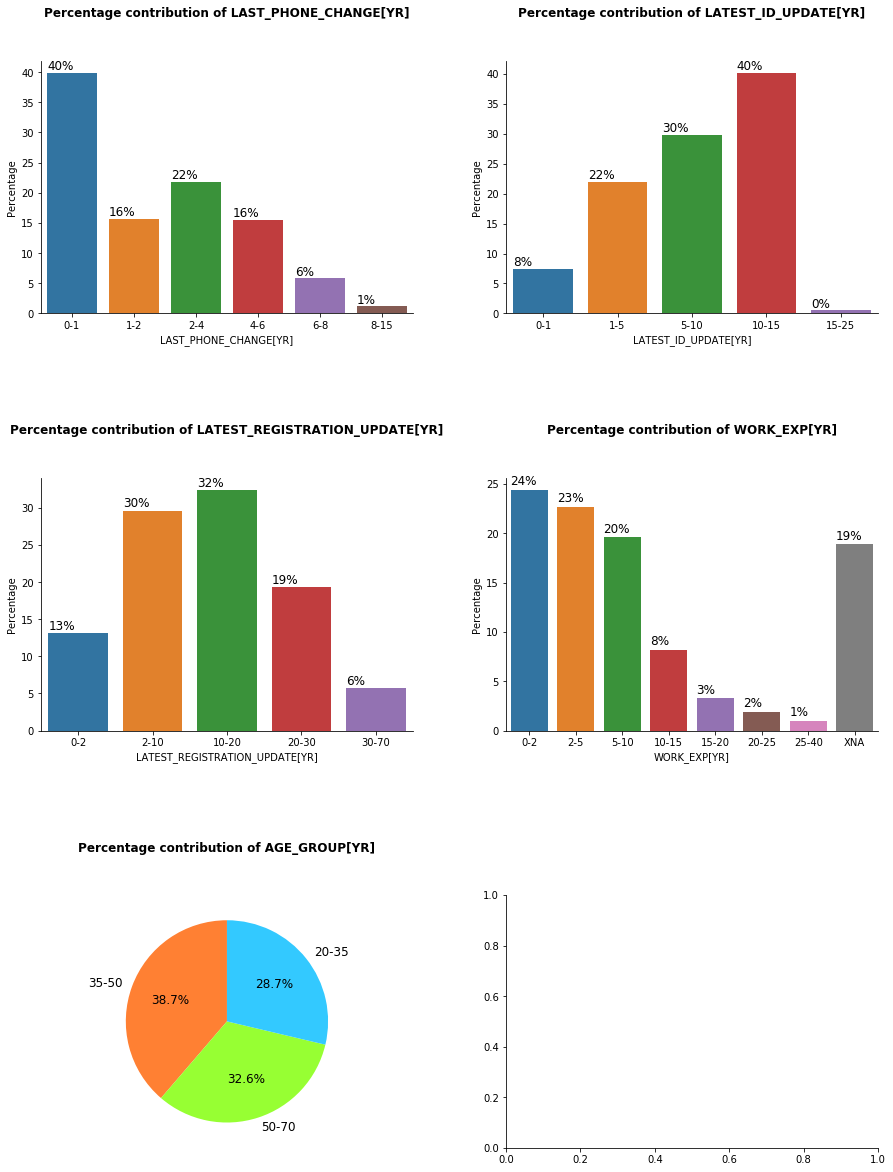

In [47]:
# Univeriate analysis for ordered categorical columns
# pre-defined function --> Uni_Categorical_bar_pie_plot

df1 = data_Fil[cat_col_list_1]
n_col_plots = 2
len_col_lst = len(cat_col_list_1)
fig_size = (15,20)
pie_size = 1.0
annot_size = 12
subplt_w =0.25
subplt_h = 0.65
En_pie = True
x_angle = 0
# Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)
Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)

In [48]:
data_Fil_col_list = data_Fil.columns
list_of_Flag_col = [s for s in data_Fil_col_list if 'FLAG' in s]
print(list_of_Flag_col)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [49]:
# list of document columns
list_of_document_col = [s for s in data_Fil_col_list if 'FLAG_DOCUMENT' in s]
print(list_of_document_col)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [50]:
df_doc_col = data_Fil[list_of_document_col] # create new data frame for documents columns

In [51]:
# Create new columns with the sum of all documents client submitted along with loan application 
data_Fil['NUM_DOCUMENTS_SUBMITTED'] = [df_doc_col.values[i].sum() for i in range(len(df_doc_col))]

In [52]:
# Drop the documents columns of FLAG_DOCUMENTS
data_Fil.drop(list_of_document_col,axis=1, inplace = True) 

In [53]:
data_Fil.shape # shape of data frame 

(305544, 57)

In [54]:
# read all available 'FALG' columns
data_Fil_col_list = data_Fil.columns
list_of_Flag_col = [s for s in data_Fil_col_list if 'FLAG' in s]
print(list_of_Flag_col)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']


In [55]:
# create a list for communication falg columns ( mobile , email details)
Comm_FLAG_Col_list = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
data_Fil[Comm_FLAG_Col_list].describe()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count    305544.0   305544.000000    305544.000000     305544.000000   
mean          1.0        0.819879         0.199078          0.998125   
std           0.0        0.384289         0.399307          0.043265   
min           1.0        0.000000         0.000000          0.000000   
25%           1.0        1.000000         0.000000          1.000000   
50%           1.0        1.000000         0.000000          1.000000   
75%           1.0        1.000000         0.000000          1.000000   
max           1.0        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  
count  305544.000000  305544.000000  
mean        0.280732       0.056827  
std         0.449358       0.231511  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

* ***Standard deviation for 'FLAG_MOBIL' & 'FLAG_CONT_MOBILE' are very less. And majority of distribution values are 1. So these both columns are not much useful for our analysis.***

In [56]:
# Drop the column  --> FLAG_MOBIL
data_Fil.drop(['FLAG_MOBIL','FLAG_CONT_MOBILE'],axis=1, inplace = True) 

In [57]:
# read all available 'FALG' columns
data_Fil_col_list = data_Fil.columns
list_of_Flag_col = [s for s in data_Fil_col_list if 'FLAG' in s]
print(list_of_Flag_col)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']


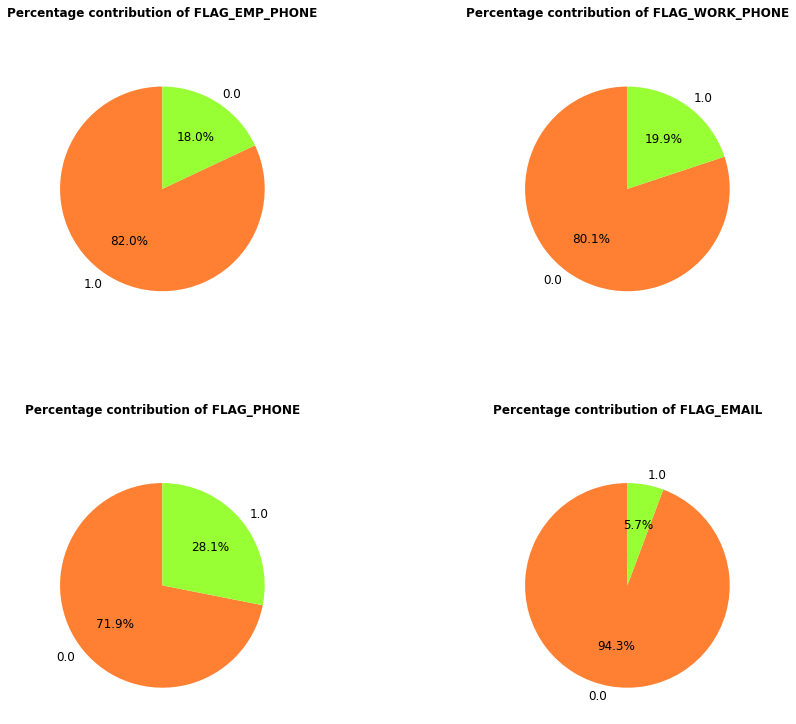

In [58]:
# Univeriate analysis for ordered categorical columns
# pre-defined function --> Uni_Categorical_bar_pie_plot
col_list_plot = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df1 = data_Fil[col_list_plot]
n_col_plots = 2
len_col_lst = len(col_list_plot)
fig_size = (15,12)
pie_size = 1.0
annot_size = 12
subplt_w =0.25
subplt_h = 0.55
En_pie = True
x_angle = 0
# Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)
Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)

In [59]:
# check the Request related columns
data_Fil_col_list = data_Fil.columns
list_of_REQ_col = [s for s in data_Fil_col_list if 'REQ' in s]
print(list_of_REQ_col)

['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


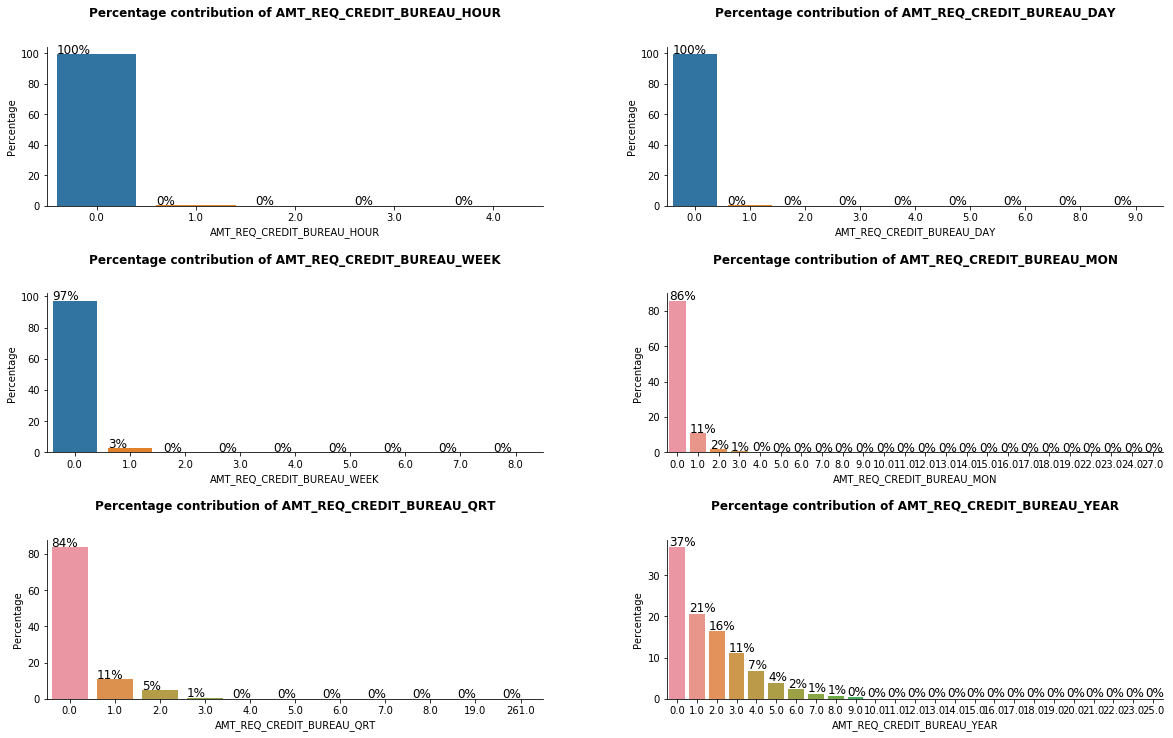

In [60]:
# Univeriate analysis for the selected 'REQUEST to CREDIT BUREAU' columns
# pre-defined function --> Uni_Categorical_bar_pie_plot

df1 = data_Fil[list_of_REQ_col]
n_col_plots = 2
len_col_lst = len(list_of_REQ_col)
fig_size = (20,12)
pie_size = 1.3
annot_size = 12
subplt_w =0.25
subplt_h = 0.55
En_pie = True
x_angle = 0
# Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)
Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)

* **From the above plots, we can clearly see, there is no much information from 'AMT_REQ_CREDIT_BUREAU_HOUR'and 'AMT_REQ_CREDIT_BUREAU_DAY' columns, So we can ignore this columns**

In [61]:
# Drop the column  --> 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'
data_Fil.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'],axis=1, inplace = True) 

In [62]:
data_Fil_col_list = data_Fil.columns
list_of_REQ_col = [s for s in data_Fil_col_list if 'REQ' in s]
print(list_of_REQ_col)

['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [63]:
#check the count realted columns
data_Fil_col_list = data_Fil.columns
list_of_CNT_col = [s for s in data_Fil_col_list if 'CNT' in s]
print(list_of_CNT_col)

['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [64]:
data_Fil[list_of_CNT_col].describe()

CNT_CHILDREN  CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  \
count  305544.000000    305544.000000             305544.000000   
mean        0.417007         2.152829                  1.417282   
std         0.722151         0.910599                  2.398764   
min         0.000000         1.000000                  0.000000   
25%         0.000000         2.000000                  0.000000   
50%         0.000000         2.000000                  0.000000   
75%         1.000000         3.000000                  2.000000   
max        19.000000        20.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             305544.000000             305544.000000   
mean                   0.142929                  1.400417   
std                    0.445999                  2.377661   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  
count             305544.000000  
mean                   0.099720  
std                    0.361761  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   24.000000

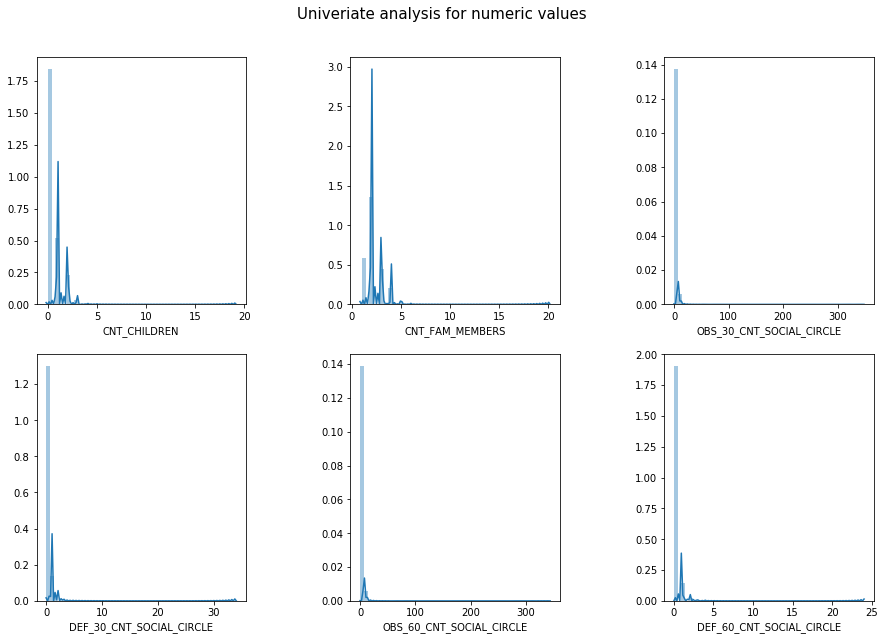

In [65]:
# Univariate analysis on count realted columns (ex: CNT_Children, CN_FAM_MEMEBRS.. and so on ) using box plot
fig, axes = plt.subplots(2,3, figsize= (15,10))
count = 0
for i in data_Fil[list_of_CNT_col].columns:
    ax = axes[count//3, count%3]
    sns.distplot(data_Fil[i], ax = ax)
    count+=1

fig.suptitle('Univeriate analysis for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjust spaces between subplots width and height  

* **CNT_CHILDREN & CNT_FAM_MEMBER there some unrealistic values observed. Categorical type would better fit for analysis for these two columns. and remain all other columns have more sample distribution close to zero, so i would like to let them like it is and will decide about these columns data when the segmented analysis performed with target variable.**

In [66]:
#for Family member more than 10 members created name with 10+ and for children more than 3 named with 3+
data_Fil['CNT_FAM_MEMBERS'] = data_Fil['CNT_FAM_MEMBERS'].apply(lambda row: row if row<6 else '6+')
data_Fil['CNT_CHILDREN']= data_Fil['CNT_CHILDREN'].apply(lambda row: row if row<3 else '3+')

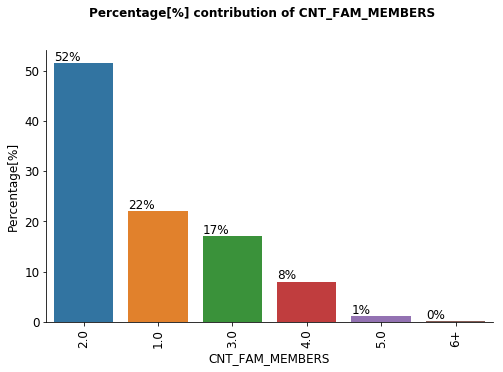

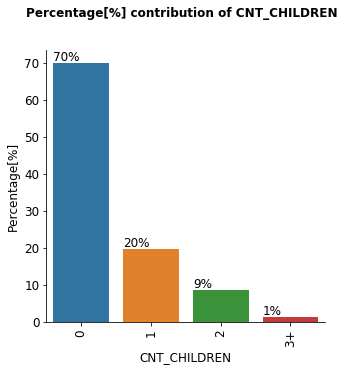

In [67]:
# Univariate analysis for 'CNT_CHILDREN' & 'CNT_FAM_MEMBER' column
# pre- defined function for Single Categorical variable to make Univeriate analysis
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)

Single_Categorical_data_bar(data_Fil,'CNT_FAM_MEMBERS','Percentage[%]',1,(8,5),12,12,12,1)
Single_Categorical_data_bar(data_Fil,'CNT_CHILDREN','Percentage[%]',1,(5,5),12,12,12,1)

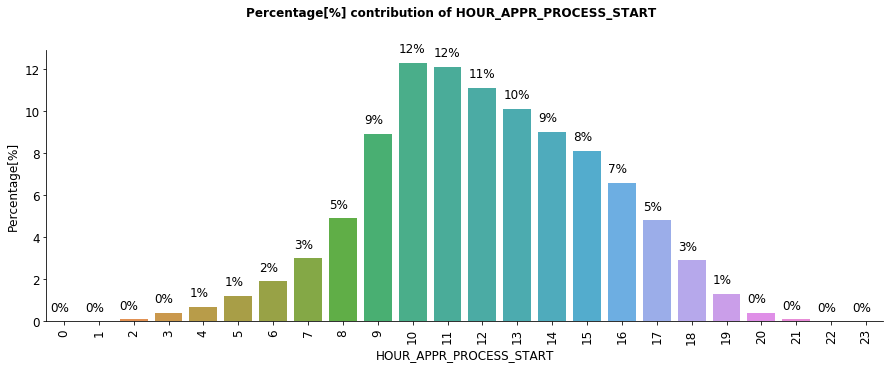

In [68]:
Single_Categorical_data_bar(data_Fil,'HOUR_APPR_PROCESS_START','Percentage[%]',1,(15,5),12,12,12,1)

In [69]:
# Univeriate Analysis for numerical columns
# En_violinplot = 1 ==> means instead of boxplot , violinplot function active
def Univariate_Analysis_Num(df,column_name,En_violinplot):
    fig = plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    if (En_violinplot==1):
        sns.violinplot(y = df[column_name])
    else:
        sns.boxplot(y = df[column_name])
    plt.subplot(1,2,2)
    sns.distplot(df[column_name])
    plt.show()

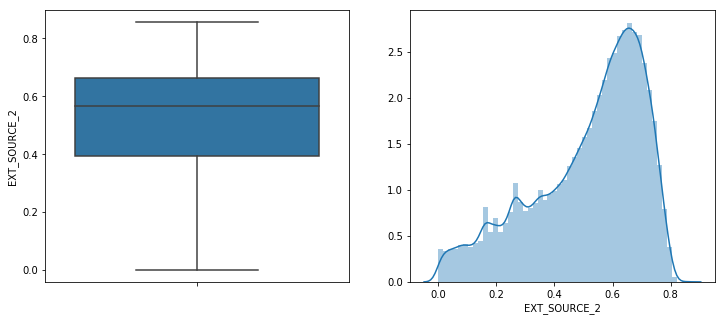

In [70]:
# univeriate analysis for the column --> EXT_SOURCE_2 using defined func 'Univariate_Analysis_Num(df,column_name)'
Univariate_Analysis_Num(data_Fil,'EXT_SOURCE_2',0)

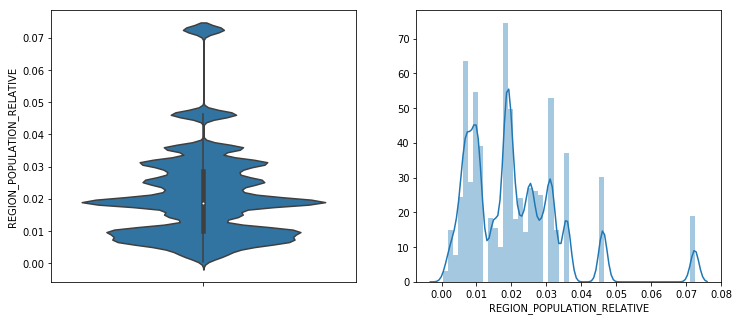

In [71]:
# univeriate analysis for the column --> REGION_POPULATION_RELATIVE using defined func 'Univariate_Analysis_Num(df,column_name)'
Univariate_Analysis_Num(data_Fil,'REGION_POPULATION_RELATIVE',1)

In [72]:
#check the count realted columns
data_Fil_col_list = data_Fil.columns
list_of_REGION_CITY_col = [s for s in data_Fil_col_list if 'REGION' in s or 'CITY' in s][1:]
print(list_of_REGION_CITY_col)

['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


In [73]:
data_Fil[list_of_REGION_CITY_col].describe()

REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         305544.000000                305544.000000   
mean               2.052696                     2.031691   
std                0.509148                     0.502834   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               305544.000000               305544.000000   
mean                     0.015153                    0.050710   
std                      0.122163                    0.219404   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                305544.000000           305544.000000   
mean                      0.040583                0.078162   
std                       0.197323                0.268427   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count           305544.000000            305544.000000  
mean                 0.230464                 0.179578  
std                  0.421131                 0.383836  
min                  0.000000                 0.000000  
25%                  0.000000                 0.000000  
50%                  0.000000                 0.000000  
75%                  0.000000                 0.000000  
max                  1.000000                 1.000000

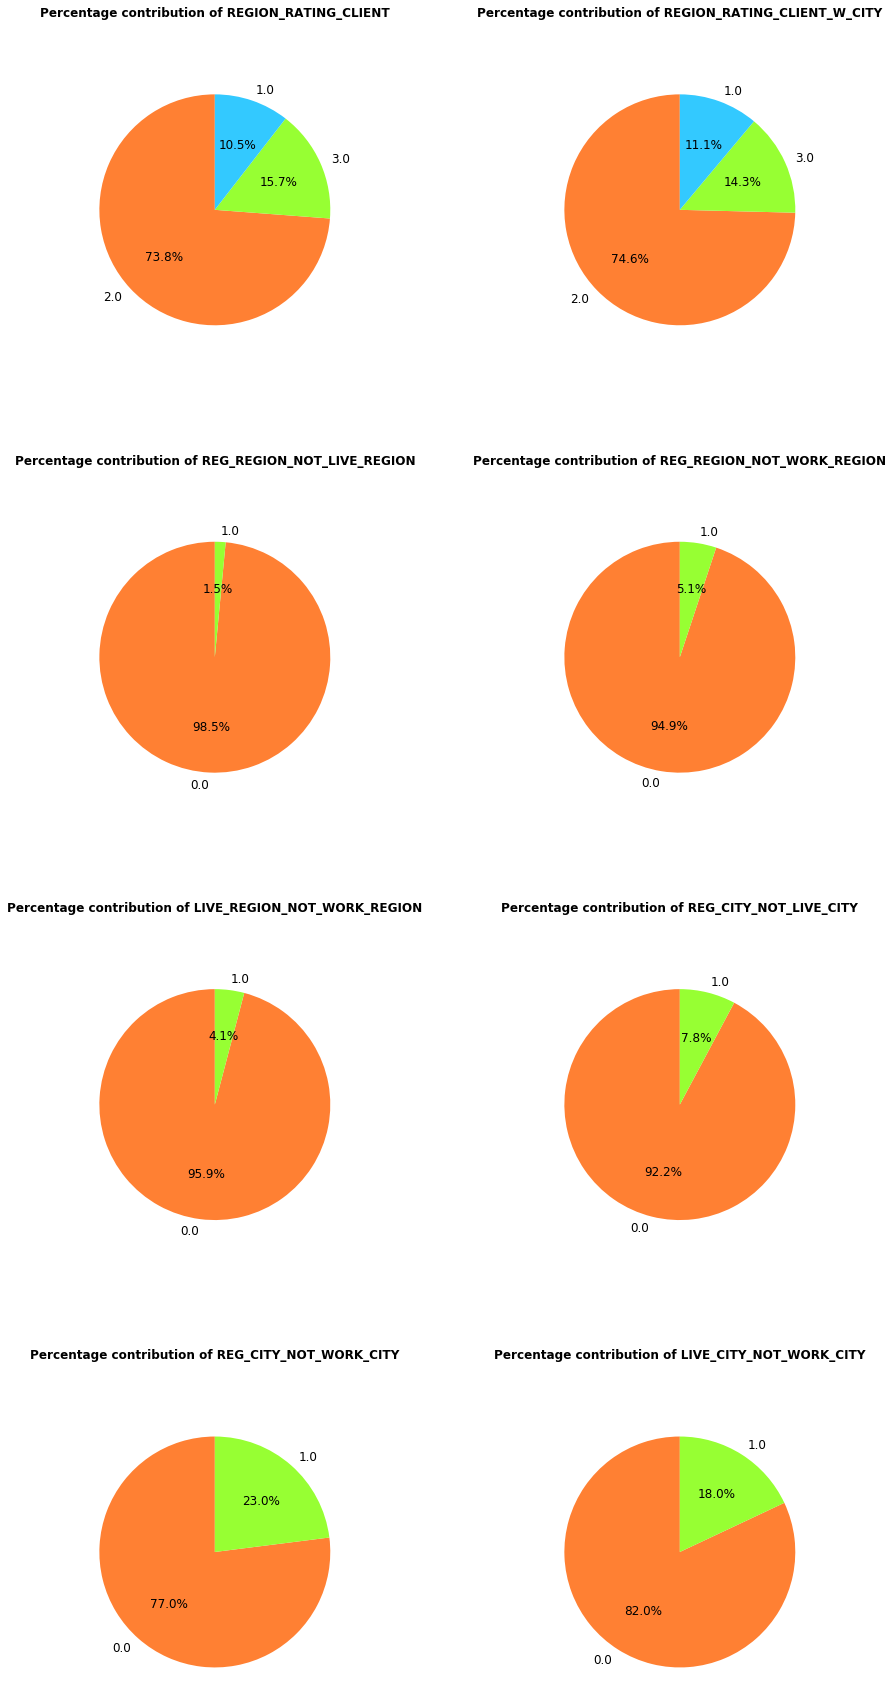

In [74]:
# Univeriate analysis for ordered categorical columns
# pre-defined function --> Uni_Categorical_bar_pie_plot

df1 = data_Fil[list_of_REGION_CITY_col]
n_col_plots = 2
len_col_lst = len(list_of_REGION_CITY_col)
fig_size = (15,30)
pie_size = 1.0
annot_size = 12
subplt_w =0.25
subplt_h = 0.55
En_pie = True
x_angle = 0
# Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)
Uni_Categorical_bar_pie_plot(n_col_plots,df1,len_col_lst,fig_size,pie_size,annot_size, subplt_w, subplt_h,En_pie,x_angle)

# Segmented Univariate and Bivariate analysis

In [75]:
# transform the categorical values to percentages
def transform_df_with_perc_calc_barplot(df,column_name,hue,En_OrderCat):
    
    # goupby with hue and column name and extract only 'SK_ID_CURR'
    data_temp = df.groupby([hue,column_name]).count()[['SK_ID_CURR']] 
    #reset the index
    data_temp.reset_index(inplace = True)
    # list the unique items from the specified column name
    list_items = list(data_temp[column_name].unique())
    df_perc =pd.DataFrame
    count = 0
    for i in list_items: # for each column item
        loc_df = data_temp.loc[data_temp[column_name]==i] # slice the data_temp w.r.t each column item
        if En_OrderCat==1:
            hue_u_len = len(df[hue].unique())
            loc_df = loc_df.groupby([column_name,hue]).sum()[(count*hue_u_len):hue_u_len+(count*hue_u_len)] 
        else:
            loc_df = loc_df.groupby([column_name,hue]).sum() # group by with coumn_name & hue with sum
        
        loc_df = loc_df.apply(lambda row:round(row/loc_df.values.sum()*100,1)) # create percentage contribution of hue.
        if count == 0:
            df_perc = loc_df.copy() # initialise the data_perc when first loop active
        else:
            df_perc = df_perc.append(loc_df) # append the result dataframe with df_perc 
        count+=1
    df_perc.columns = ['Percentage'] # rename the columns with 'Percentage'
    df_perc.reset_index(inplace = True) # reset the index,to make avail column_name & hue in the data_perc columns list
    return(df_perc)

In [76]:
#function for ploting segmented categorical variables with calculated percentage distribution 
#En_pie ==> 1 enables pie plot , default 0 for bar plot
    
def categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat):
    
    data_Def = df.loc[df['TARGET']==1] # defaulter
    data_Non_Def = df.loc[df['TARGET']==0] # replayer
    
    data_Def_pie = data_Def.groupby(['TARGET',column_name]).count()
    data_NonDef_pie = data_Non_Def.groupby(['TARGET',column_name]).count()
    count = 0
    if En_pie ==1:
        fig = plt.figure(figsize=fig_size)
        colors_pie = ['#FF8033','#97FF33','#33C9FF', '#EFEE0A']  # color code for each sector
        
        for df_loop in (data_Def_pie,data_NonDef_pie):
            if count == 0:
                title = 'Defaulters'
                plt.subplot(1, 2, 1)
            else:
                title = 'Repayers'
                plt.subplot(1, 2, 2)
            count+=1
            
            plt.pie(df_loop.values[:,0], 
                   labels=df_loop.index.levels[1][:], 
                   startangle=xlable_deg, 
                   autopct = '%1.0f%%',
                   textprops={'size': 'large'}, 
                   colors=colors_pie)
            plt.title(title, fontsize = subtitle_font) # set the title font size

        plt.suptitle('Percentage of '+column_name+'_ W.r.t_TARGET',fontsize=title_font,x =0.50, y=0.85)
        
        fig.subplots_adjust(wspace=0.5, hspace = 0.5)
        plt.show()
    
    if En_pie == 0:
        # transform the data frame values to percentages
        data_Def_perc = transform_df_with_perc_calc_barplot(data_Def,column_name,hue,En_OrderCat).copy()
        data_Non_Def_perc = transform_df_with_perc_calc_barplot(data_Non_Def,column_name,hue,En_OrderCat).copy()
        
        fig = plt.figure(figsize=fig_size)
        for df_loop in (data_Def_perc,data_Non_Def_perc):
            if count == 0:
                title = 'Defaulters'
                plt.subplot(1, 2, 1)
                
            else:
                title = 'Repayers'
                plt.subplot(1, 2, 2)
            count+=1
            
            fig1 = sns.barplot(x = column_name ,y = 'Percentage', data = df_loop, hue=hue)
            sns.despine(top=True, right=True, left=False, bottom=False)
            plt.xticks(rotation= xlable_deg)
            plt.xticks(fontsize=subtitle_font-1)
            plt.yticks(fontsize=subtitle_font-1)
            plt.xlabel(column_name,fontsize=subtitle_font-1)
            plt.ylabel('Percentage',fontsize=subtitle_font-1)
            plt.title(title, fontsize = subtitle_font,x =0.5, y=1.05) # set the title font size
            Perc_annotation(fig1,annot_size,1)
            #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.suptitle('Percentage of '+column_name+'_ W.r.t_'+hue,fontsize=title_font,x =0.5, y=1.1)
        fig.subplots_adjust(wspace=0.5, hspace = 0.5)
    plt.show()

In [77]:
# single barplot with hue,categories will plot with percentages along with annotations 
def barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift):
    
# Percentage contribution of NAME_CONTRACT_TYPE with respect to TARGET
# use the defined fucn for transforming data in to percentage 
# ==>transform_df_with_perc_calc_barplot(df,column_name,hue,En_OrderCat)

    df_perc_barplot = transform_df_with_perc_calc_barplot(df,column_name,hue,En_OrderCat).copy()

    fig = plt.figure(figsize=figsize)
    fig = sns.barplot(x = column_name, y = 'Percentage',hue = hue, data = df_perc_barplot)
    sns.despine(top=True, right=True, left=False, bottom=False)
    if Enlegend_shift==1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('% Contribution of '+column_name+' w.r.t '+hue+'\n', fontsize = titlefont)
    Perc_annotation(fig,annot_size,1)

    plt.show()

In [78]:
data_Fil_Def = data_Fil.loc[data_Fil['TARGET']==1] # defaulters
data_Fil_Non_Def = data_Fil.loc[data_Fil['TARGET']==0] # re-payers

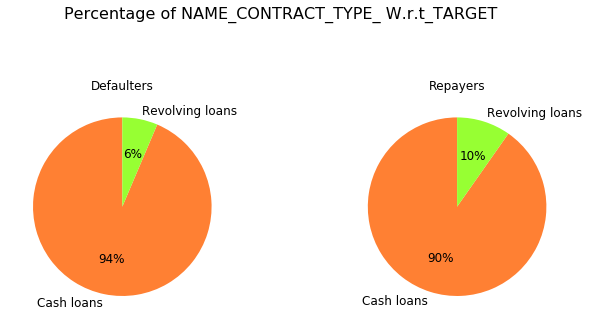

Note:- Contract type percentage contribution with in DEFAULTERS & REPAYERS 



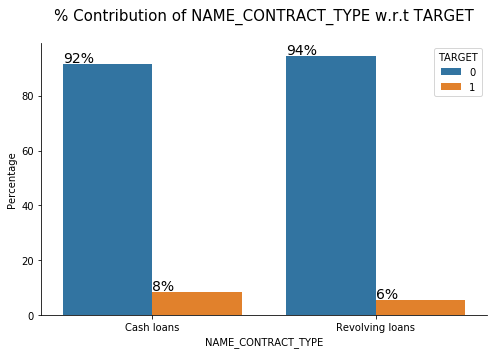

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to Contract type 



In [79]:
# Percentage contribution of contract type with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'NAME_CONTRACT_TYPE',1,'TARGET',1,12,(10,8),12,16,90,0)

print('\033[1m'+'\033[94m'+'Note:- Contract type percentage contribution with in DEFAULTERS & REPAYERS \n')

# Percentage contribution of NAME_CONTRACT_TYPE with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_CONTRACT_TYPE','TARGET',(8,5),15,14,0,0)

print('\033[1m'+'\033[94m'+'Note:- DEFAULTERS & REPAYERS percentage contribution with respect to Contract type \n')

* ***Cash loans having slightly higher defaulters, than Revolving loans.*** 

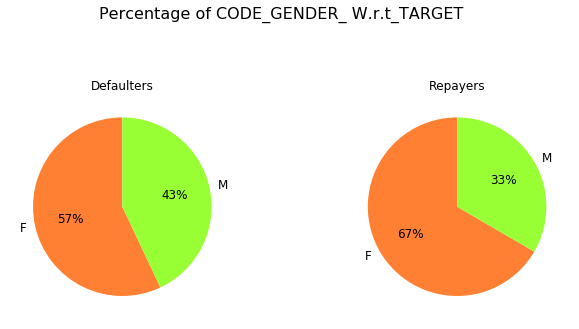

Note:- Gender percentage contribution with in DEFAULTERS & REPAYERS 



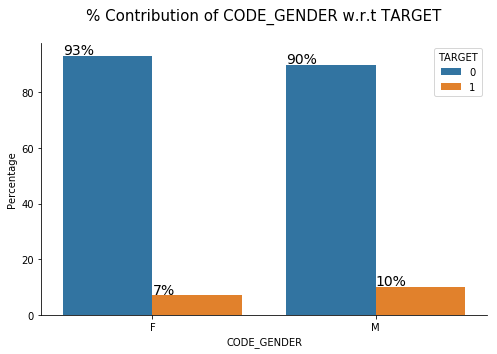

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to gender 



In [80]:
# Percentage contribution of gender with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'CODE_GENDER',1,'TARGET',1,12,(10,8),12,16,90,0)
print('\033[1m'+'\033[94m'+'Note:- Gender percentage contribution with in DEFAULTERS & REPAYERS \n')

# Percentage contribution of CODE_GENDER with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'CODE_GENDER','TARGET',(8,5),15,14,0,0)
print('\033[1m'+'\033[94m'+'Note:- DEFAULTERS & REPAYERS percentage contribution with respect to gender \n')

* ***Defaulters percentage of males is 10%, in this case Gender cannot be direct correlated variable to make defaults. So we need to check Male with age, education profession, income type & so on.. are influencing Males category to make default the loan higher than female.***  

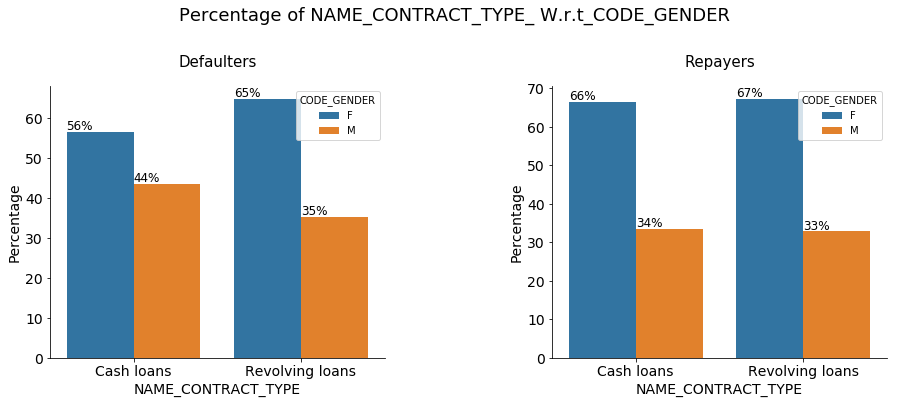

In [81]:
#percentage contribution of gender in each contract type with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'NAME_CONTRACT_TYPE',0,'CODE_GENDER',1,12,(15,5),15,18,0,0)

* **Defaulter percentage of males is 10% higher with "Cash loans" contract type only**  

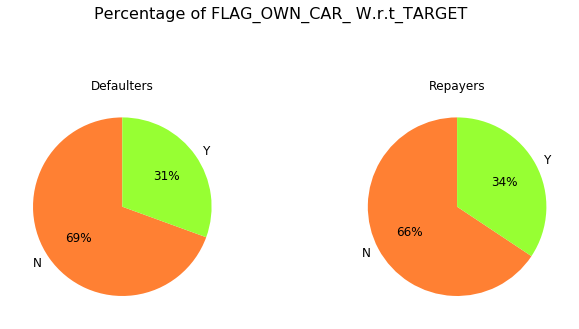

Note:- Own Car percentage contribution with in DEFAULTERS & REPAYERS 



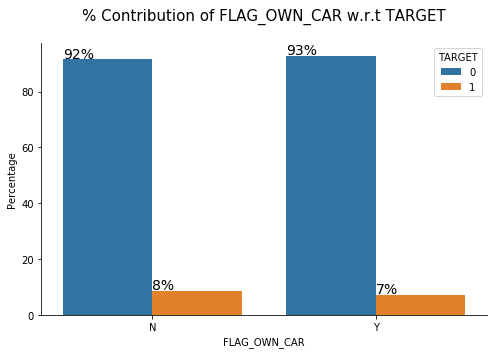

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to own car 



In [82]:
# Percentage contribution of FLAG_OWN_CAR with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_CAR',1,'TARGET',1,12,(10,8),12,16,90,0)
print('\033[1m'+'\033[94m'+'Note:- Own Car percentage contribution with in DEFAULTERS & REPAYERS \n')

# Percentage contribution of FLAG_OWN_CAR with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'FLAG_OWN_CAR','TARGET',(8,5),15,14,0,0)
print('\033[1m'+'\033[94m'+'Note:- DEFAULTERS & REPAYERS percentage contribution with respect to own car \n')

* ***As per the details from the plot: Client who has no own car 1% more chance to make loan default. So my point view there is no direct relation of defaulter with OWN CAR***

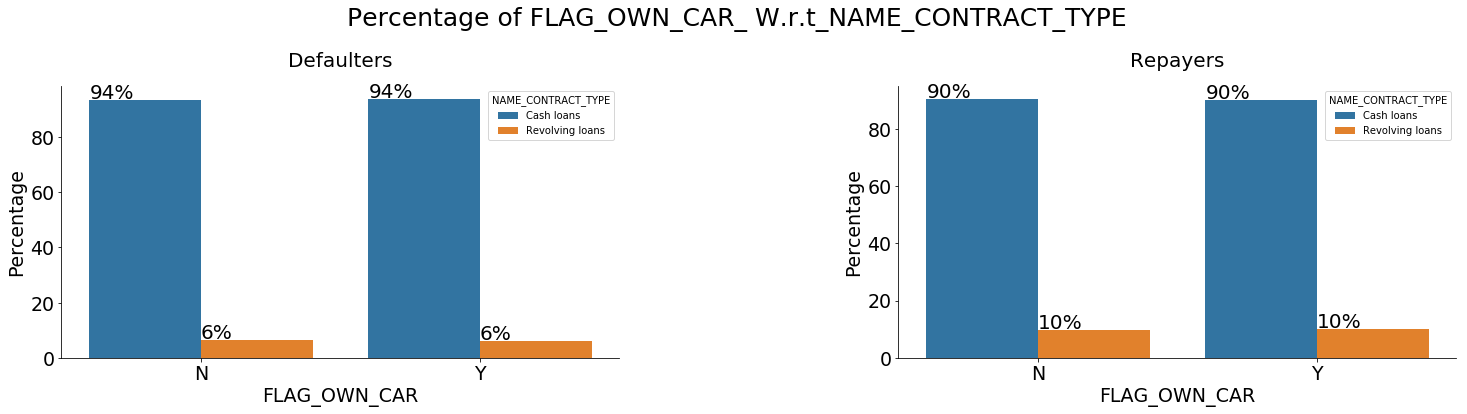

In [83]:
#percentage contribution of contract type in FLAG_OWN_CAR with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_CAR',0,'NAME_CONTRACT_TYPE',1,20,(25,5),20,25,0,0)

* ***Defaulter are 4% more with Cash loans, irrespective of having OWN CAR or not***  

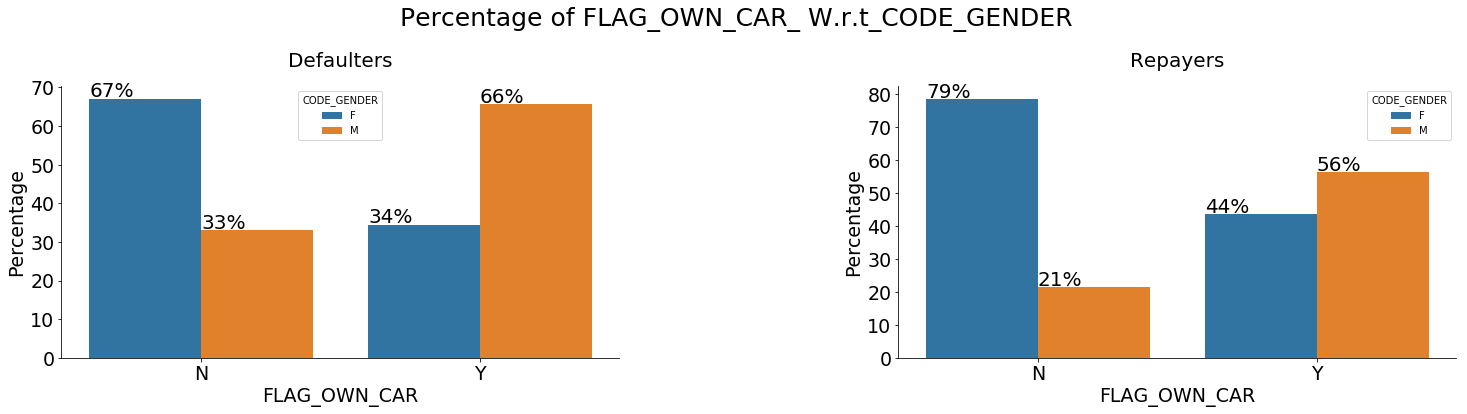

In [84]:
#percentage contribution of gender in FLAG_OWN_CAR with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)
categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_CAR',0,'CODE_GENDER',1,20,(25,5),20,25,0,0)

* ***Defaulter are ~10% more with Males, irrespective of having OWN CAR or not***  

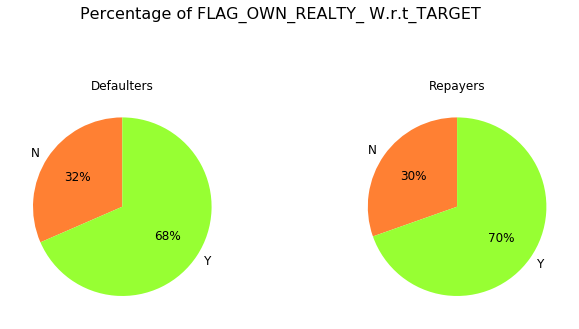

Note:- Own Reality percentage contribution with in DEFAULTERS & REPAYERS 



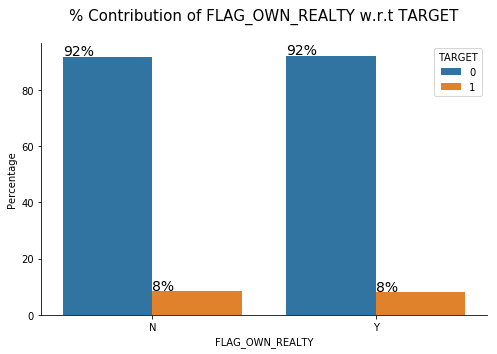

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to own reality 



In [85]:
# Percentage contribution of FLAG_OWN_REALTY with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_REALTY',1,'TARGET',1,12,(10,8),12,16,90,0)
print('\033[1m'+'\033[94m'+'Note:- Own Reality percentage contribution with in DEFAULTERS & REPAYERS \n')

# Percentage contribution of FLAG_OWN_REALTY with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'FLAG_OWN_REALTY','TARGET',(8,5),15,14,0,0)
print('\033[1m'+'\033[94m'+'Note:- DEFAULTERS & REPAYERS percentage contribution with respect to own reality \n')

* ***There is no key observations with respect to Own Reality. but cases defaulters rate similar***

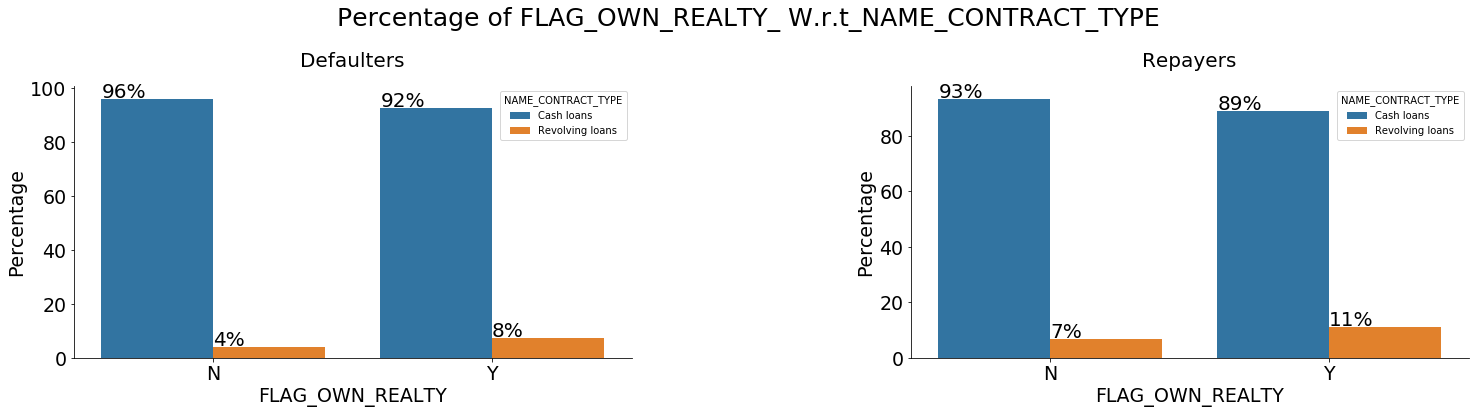

In [86]:
#percentage contribution of contract type in FLAG_OWN_REALTY with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_REALTY',0,'NAME_CONTRACT_TYPE',1,20,(25,5),20,25,0,0)

* ***There is not much significant observation of defaulters in FLAG_OWN_REALTY with respect to contact type***

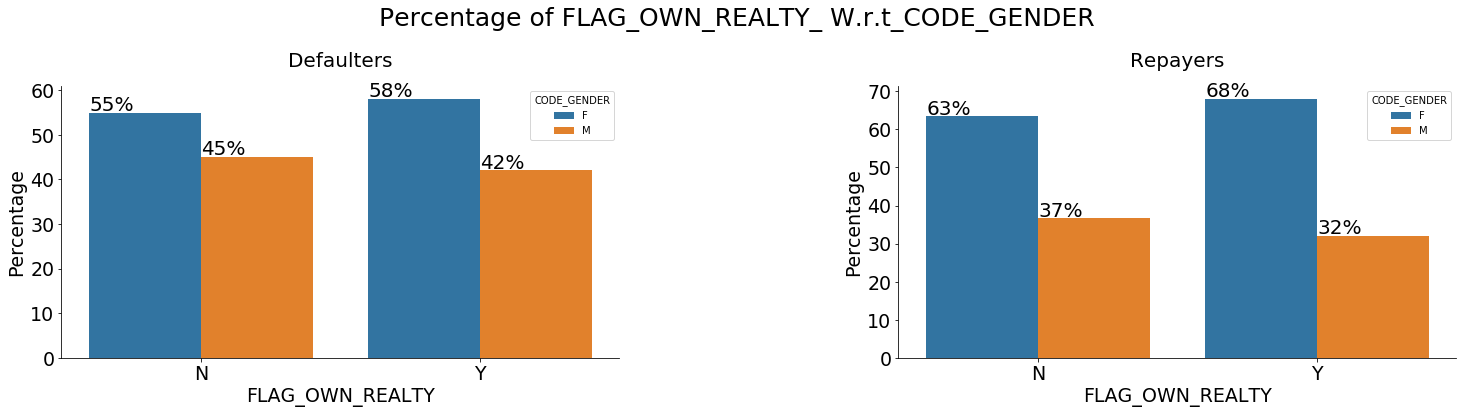

In [87]:
#percentage contribution of gender in FLAG_OWN_REALTY with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'FLAG_OWN_REALTY',0,'CODE_GENDER',1,20,(25,5),20,25,0,0)

* ***There is not much significant difference if client having own reality or not with respect to gender***

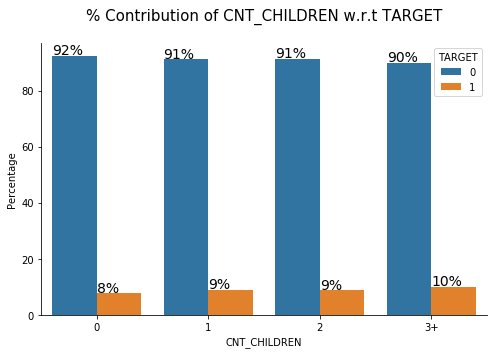

In [88]:
# Percentage contribution of CNT_CHILDREN with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'CNT_CHILDREN','TARGET',(8,5),15,14,0,0)

* ***(approx ~1%) of defaulters in increasing with increasing count of children*** 

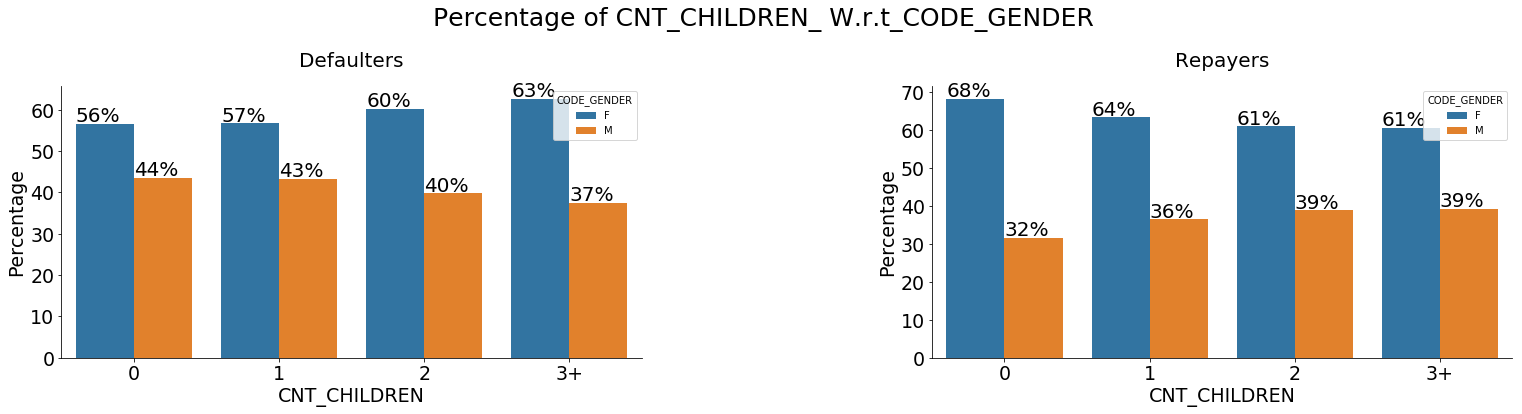

In [89]:
#percentage contribution of gender in CNT_CHILDREN with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'CNT_CHILDREN',0,'CODE_GENDER',1,20,(26,5),20,25,0,0)

* ***There is about 12% higher Defaulters from Male gender when there is no children. Looks like this related to age of client also, may be younger client makes more defaults. And younger clients might not have children and may be this could be the reason No children criteria give more percentage of defaults. We can check when we compare defaulters rate w.r.t age in the following analysis.***

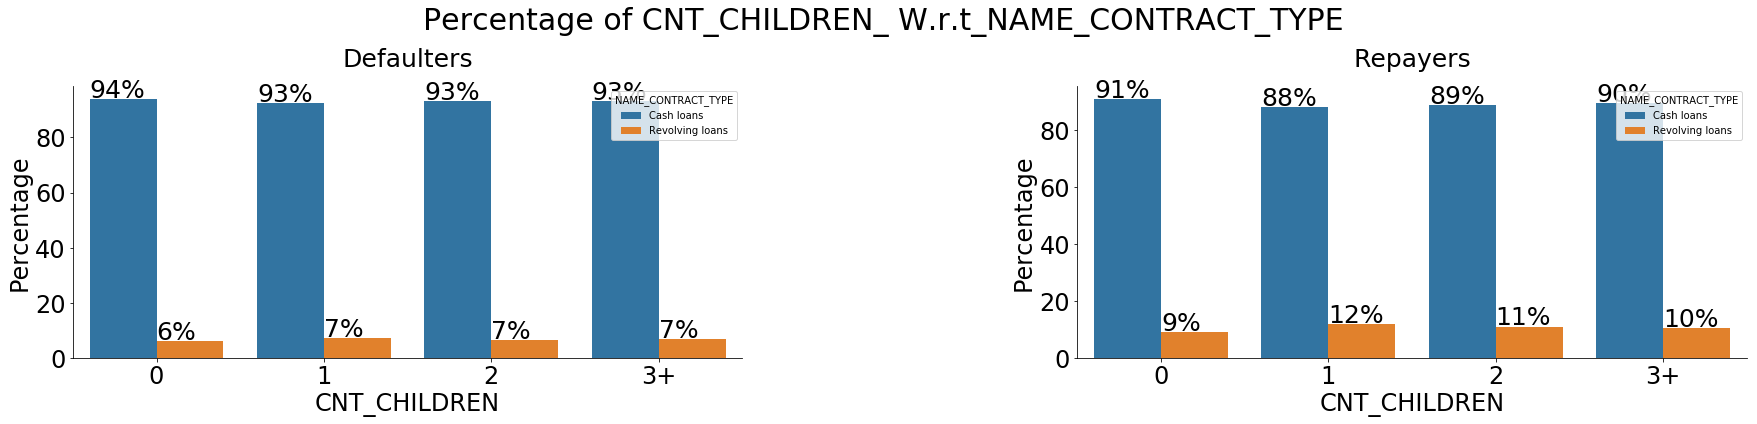

In [90]:
#percentage contribution of contract type in CNT_CHILDREN with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'CNT_CHILDREN',0,'NAME_CONTRACT_TYPE',1,25,(30,5),25,30,0,0)

* ***There is not much significant observation of defaulters in increasing count of children w.r.t contract type***

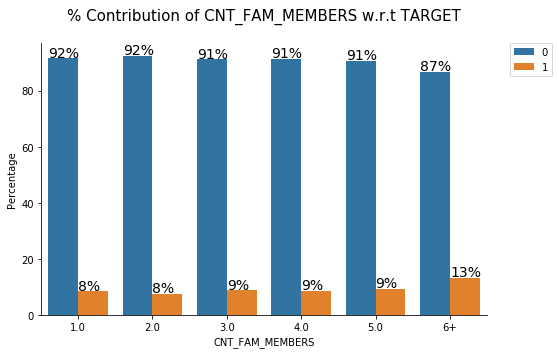

In [91]:
# Percentage contribution of CNT_FAM_MEMBERS with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'CNT_FAM_MEMBERS','TARGET',(8,5),15,14,0,1)

* ***There is no significant relation of defaulter’s with family members count. 6+ family members showing increasing 4%, which not major point to be considered, since the there is only 4% change and also some outliers/ extreme values are there when the family members increased to 6 members***  

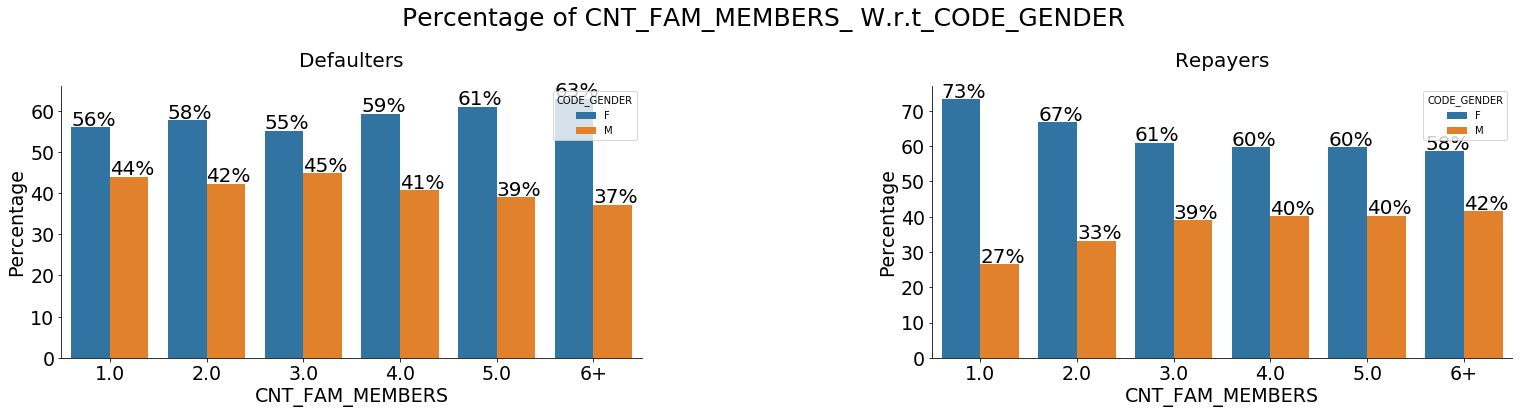

In [92]:
#percentage contribution of gender in CNT_FAM_MEMBERS with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)

categorical_var_w_r_t_hue(data_Fil,'CNT_FAM_MEMBERS',0,'CODE_GENDER',1,20,(26,5),20,25,0,0)

* ***Something interesting here. Having less number of family members Males tends to default the loan more. And for females it is quite opposite, more number of family members, more possibility of default the loan.***

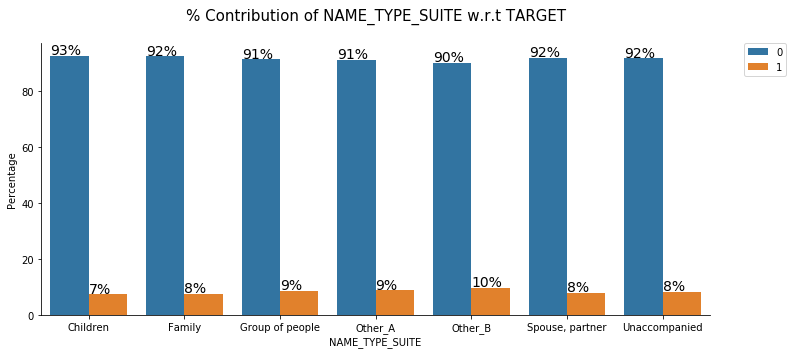

In [93]:
# Percentage contribution of NAME_TYPE_SUITE with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_TYPE_SUITE','TARGET',(12,5),15,14,0,1)

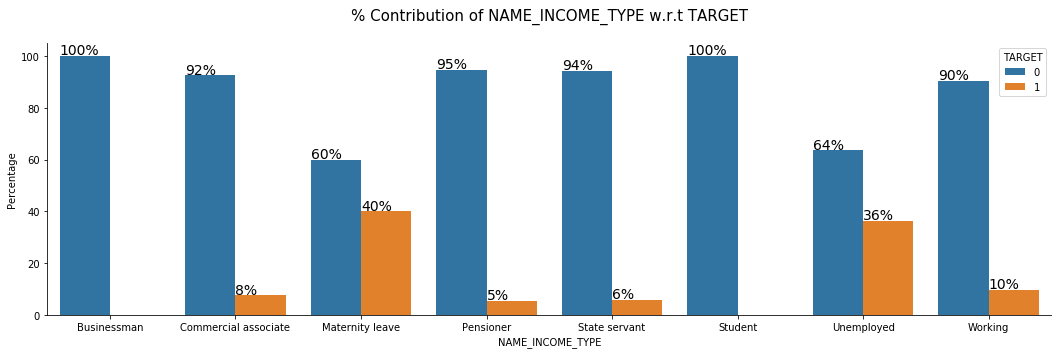

In [94]:
# Percentage contribution of NAME_TYPE_SUITE with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_INCOME_TYPE','TARGET',(18,5),15,14,0,0)

* ***Income type of Maternity leave & Unemployed are highly correlated with loan payments. Defaulter’s percentage is about 40 & 36 for these income types respectively. For working people also 10% default rate noted*** 

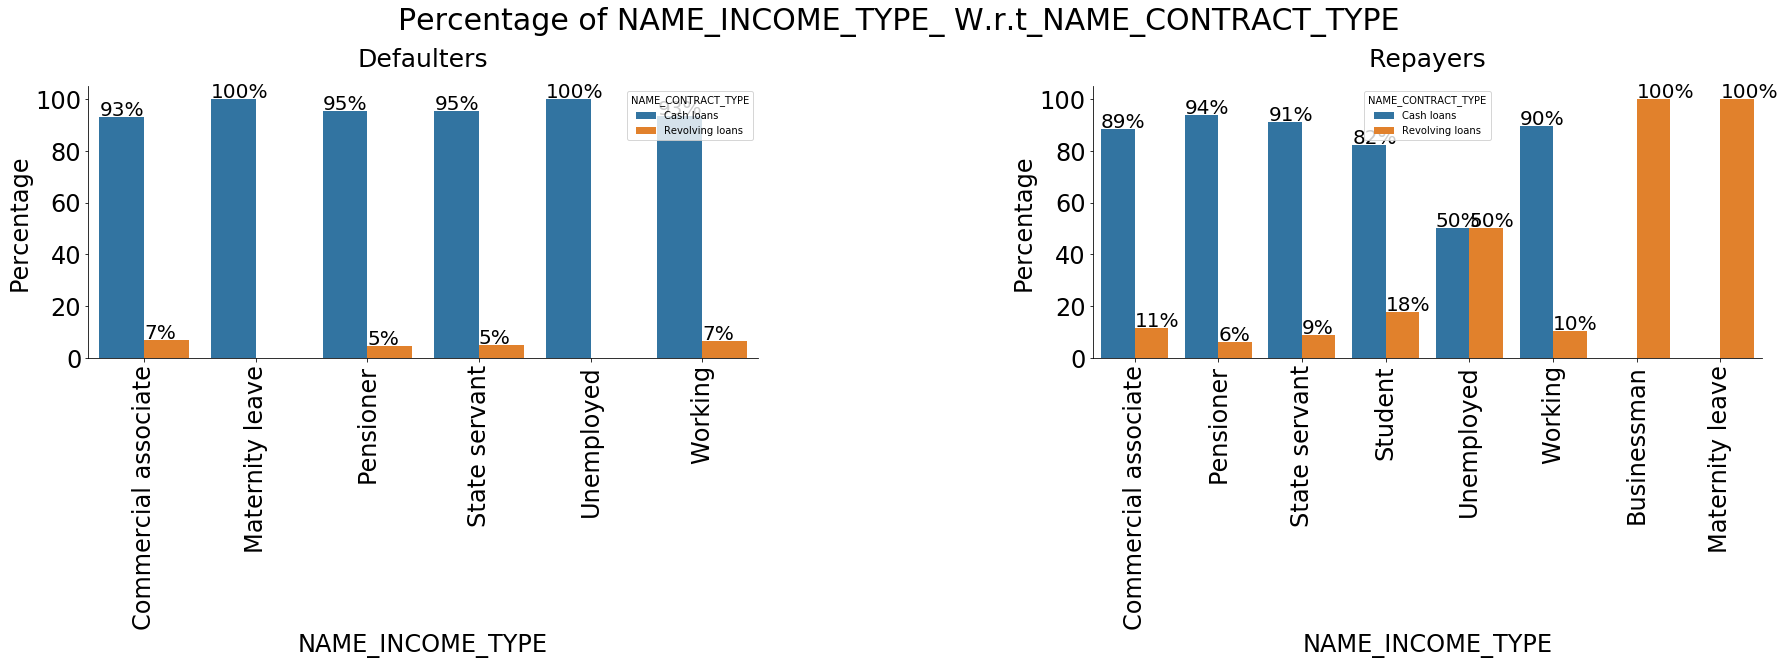

In [95]:
#percentage contribution of contract type in NAME_INCOME_TYPE with respect to TARGET
#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)
categorical_var_w_r_t_hue(data_Fil,'NAME_INCOME_TYPE',0,'NAME_CONTRACT_TYPE',1,20,(30,5),25,30,90,0)

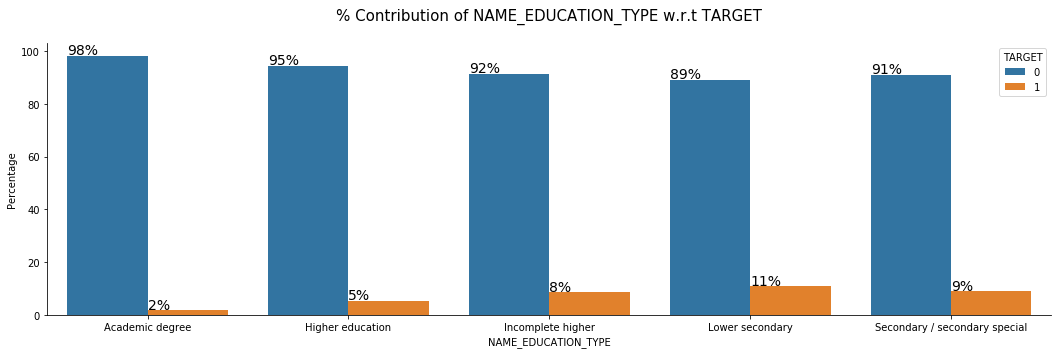

In [96]:
# Percentage contribution of NAME_EDUCATION_TYPE with respect to TARGET

#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_EDUCATION_TYPE','TARGET',(18,5),15,14,0,0)

* ***Higher educated people make less possibility of default the loan***

Defaulters


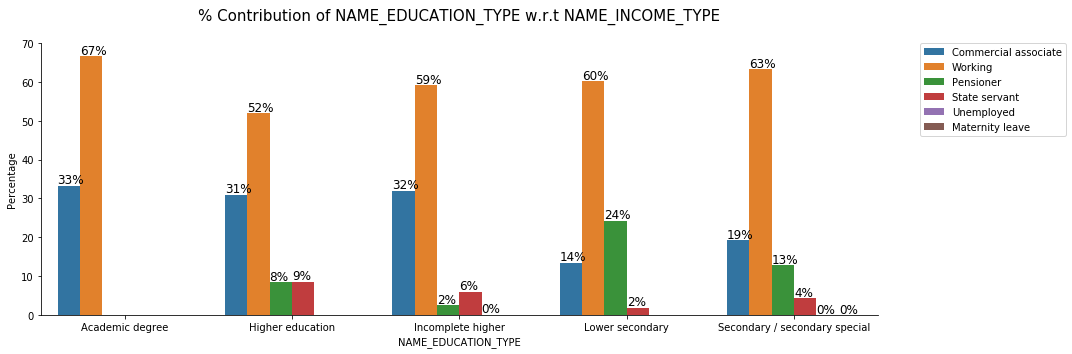

In [97]:
# Percentage contribution of NAME_EDUCATION_TYPE with respect to NAME_INCOME_TYPE==>defaulters
print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Def,'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE',(15,5),15,12,0,1)

* ***Working people from income type makes more default with respect to all education types. There might be chances that working people takes more loans***

Repayers


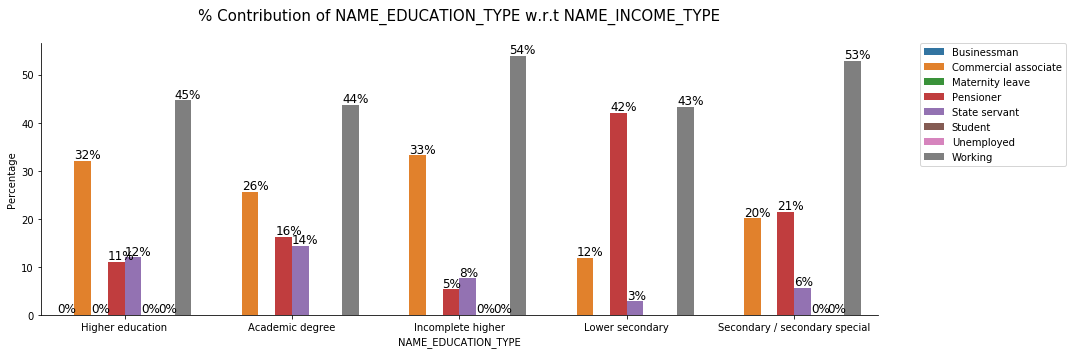

In [98]:
# Percentage contribution of NAME_EDUCATION_TYPE with respect to NAME_INCOME_TYPE

print('\033[1m'+'\033[94m'+'\033[4m'+'Repayers')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Non_Def,'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE',(15,5),15,12,0,1)

* ***if we compare with default plot before this plot. we see that default rate for working people is high and repayers are also high. but still default percentage is more for working people.***

Defaulters


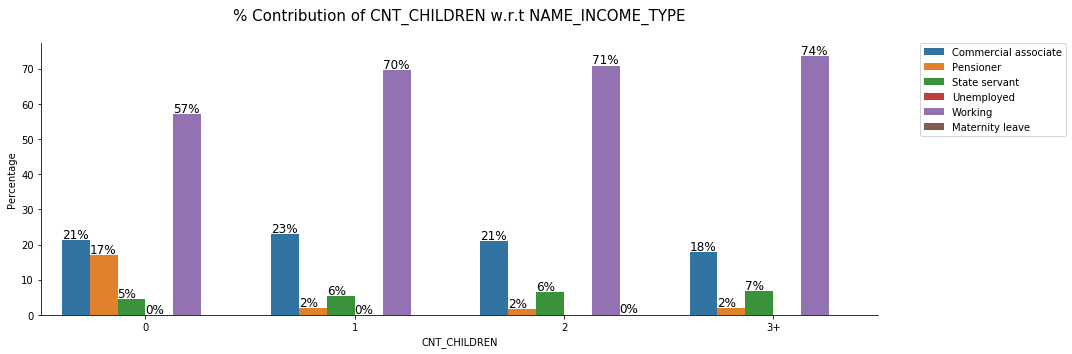

In [99]:
# Percentage contribution of CNT_CHILDREN with respect to NAME_INCOME_TYPE

print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Def,'CNT_CHILDREN','NAME_INCOME_TYPE',(15,5),15,12,0,1)

* ***Working people default rate increases with increasing number of children***

Defaulters


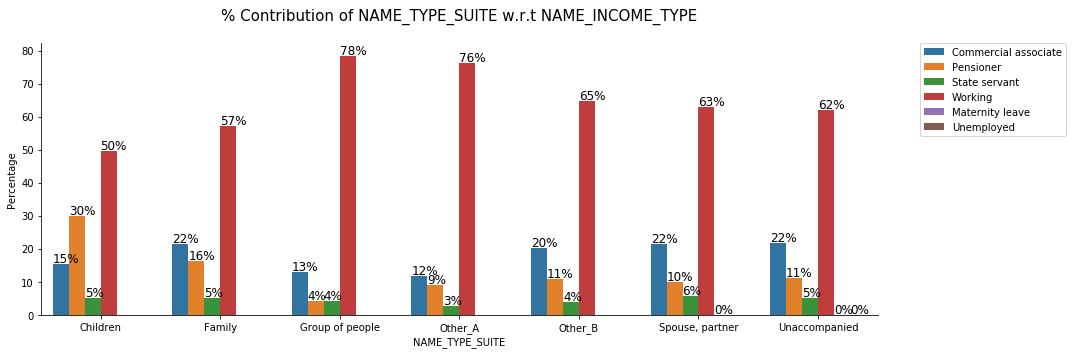

In [100]:
# Percentage contribution of NAME_TYPE_SUITE with respect to NAME_INCOME_TYPE

print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Def,'NAME_TYPE_SUITE','NAME_INCOME_TYPE',(15,5),15,12,0,1)

* ***For working people group of people & other A types of surety make highest default. In general working people having more details with any type of surety.***  

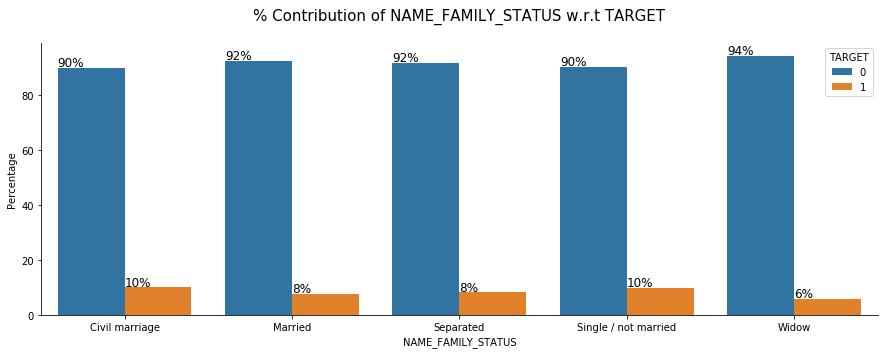

In [101]:
# Percentage contribution of NAME_FAMILY_STATUS with respect to TARGET

#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_FAMILY_STATUS','TARGET',(15,5),15,12,0,0)

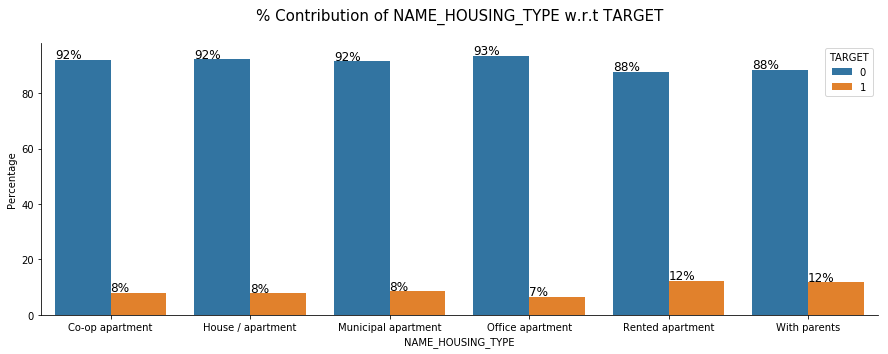

In [102]:
# Percentage contribution of NAME_HOUSING_TYPE with respect to TARGET

#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NAME_HOUSING_TYPE','TARGET',(15,5),15,12,0,0)

* ***housing type influence default rate, slightly higher defaulters with rented apartment and with parents than other categories from the Housing type***

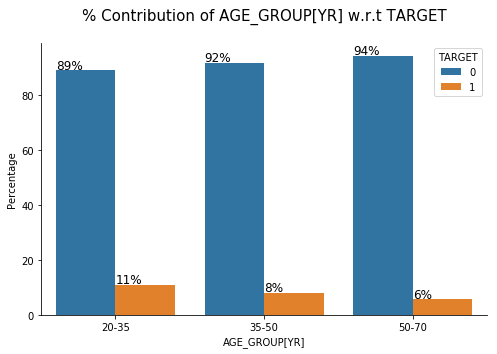

In [103]:
# Percentage contribution of AGE_GROUP[YR] with respect to TARGET

#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'AGE_GROUP[YR]','TARGET',(8,5),15,12,1,0)

* ***Younger age ( 20-35 ) are making more default the loans than older age people.***

Defaulters


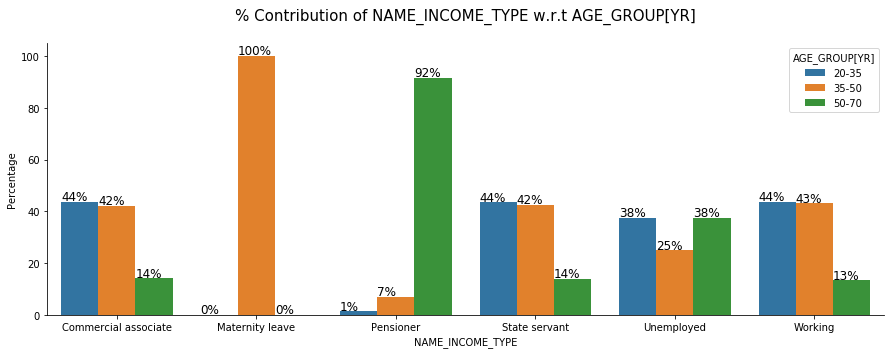

In [104]:
# Percentage contribution of NAME_INCOME_TYPE with respect to AGE_GROUP[YR]==>defaulters

print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Def,'NAME_INCOME_TYPE','AGE_GROUP[YR]',(15,5),15,12,0,0)

Repayers


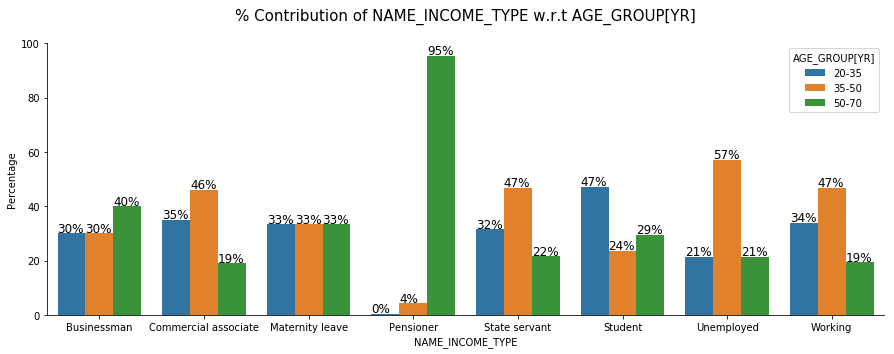

In [105]:
# Percentage contribution of NAME_INCOME_TYPE with respect to AGE_GROUP[YR]==>replayers
print('\033[1m'+'\033[94m'+'\033[4m'+'Repayers')
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil_Non_Def,'NAME_INCOME_TYPE','AGE_GROUP[YR]',(15,5),15,12,0,0)

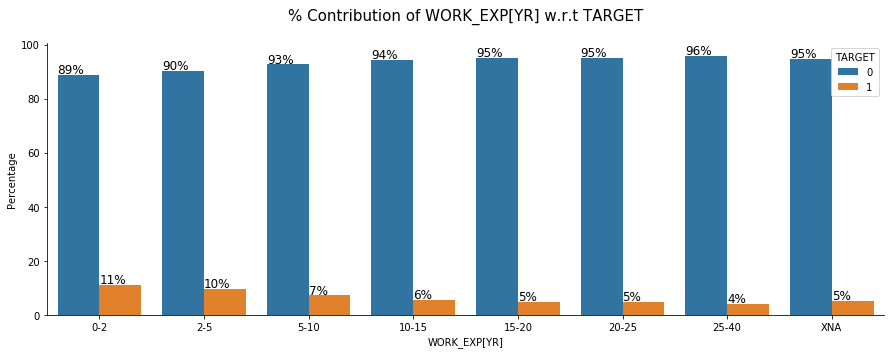

In [106]:
# Percentage contribution of WORK_EXP[YR] with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'WORK_EXP[YR]','TARGET',(15,5),15,12,1,0)

* ***Less work experience leads to make difficulties to repay loan amount by the client***

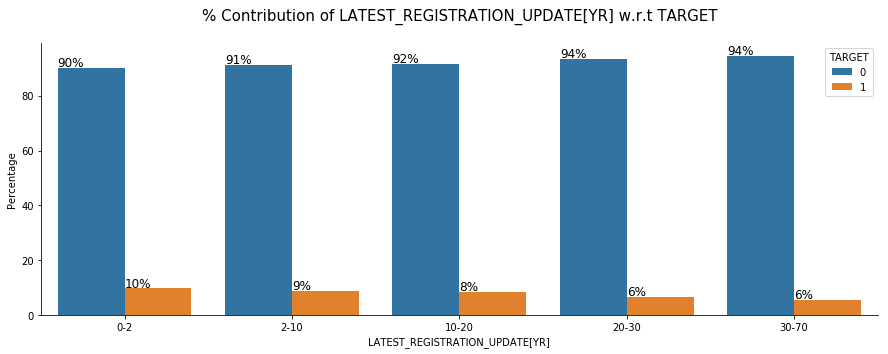

In [107]:
# Percentage contribution of LATEST_REGISTRATION_UPDATE[YR] with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'LATEST_REGISTRATION_UPDATE[YR]','TARGET',(15,5),15,12,1,0)

* ***Recent registrations, having more contribution towards to defaulters***

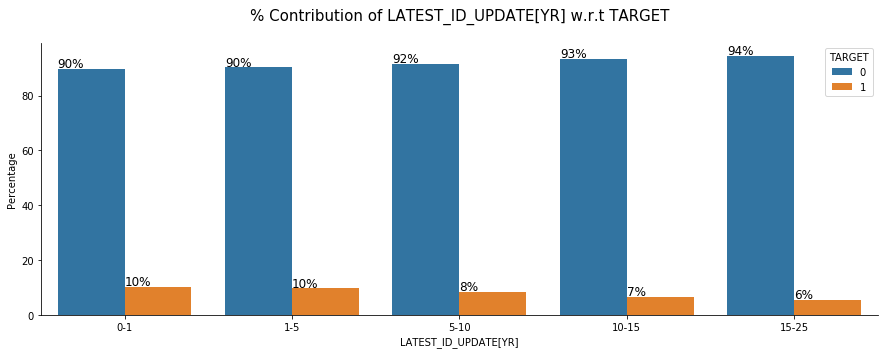

In [108]:
# Percentage contribution of LATEST_ID_UPDATE[YR] with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'LATEST_ID_UPDATE[YR]','TARGET',(15,5),15,12,1,0)

* ***Recent ID update/ publish tends to have more defaulters***

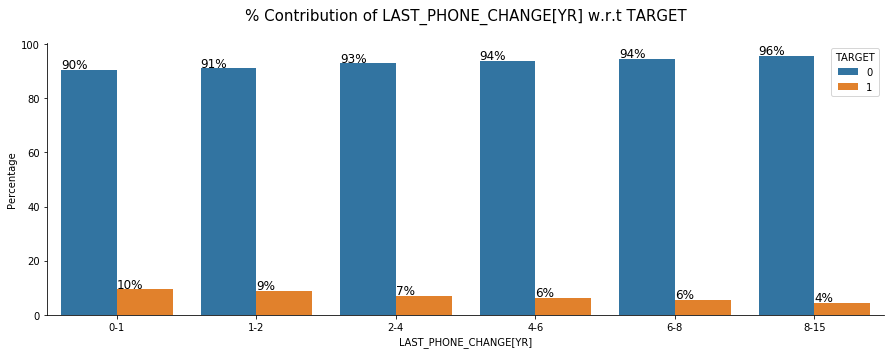

In [109]:
# Percentage contribution of LAST_PHONE_CHANGE[YR] with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'LAST_PHONE_CHANGE[YR]','TARGET',(15,5),15,12,1,0)

* ***Recent phone change, showing some correlation with higher chances of defaulters***

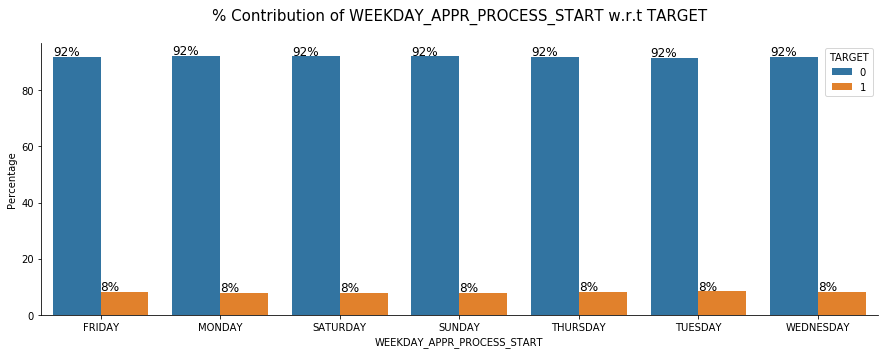

In [110]:
# Percentage contribution of WEEKDAY_APPR_PROCESS_START with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'WEEKDAY_APPR_PROCESS_START','TARGET',(15,5),15,12,0,0)

* ***There is no key observation, the percentage of defaulters are same for all days with start process***

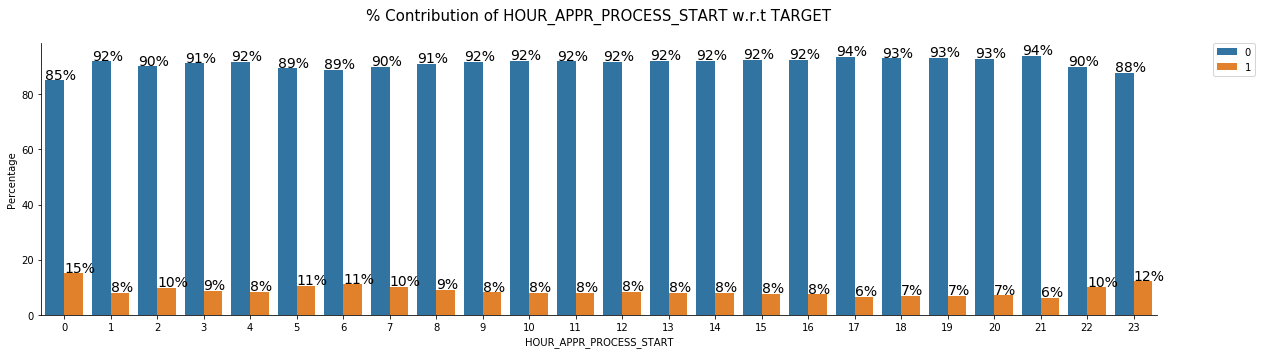

In [111]:
# Percentage contribution of HOUR_APPR_PROCESS_START with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'HOUR_APPR_PROCESS_START','TARGET',(20,5),15,14,0,1)

* ***% of defaulter are more, when client start process in mid night hours***

Defaulters


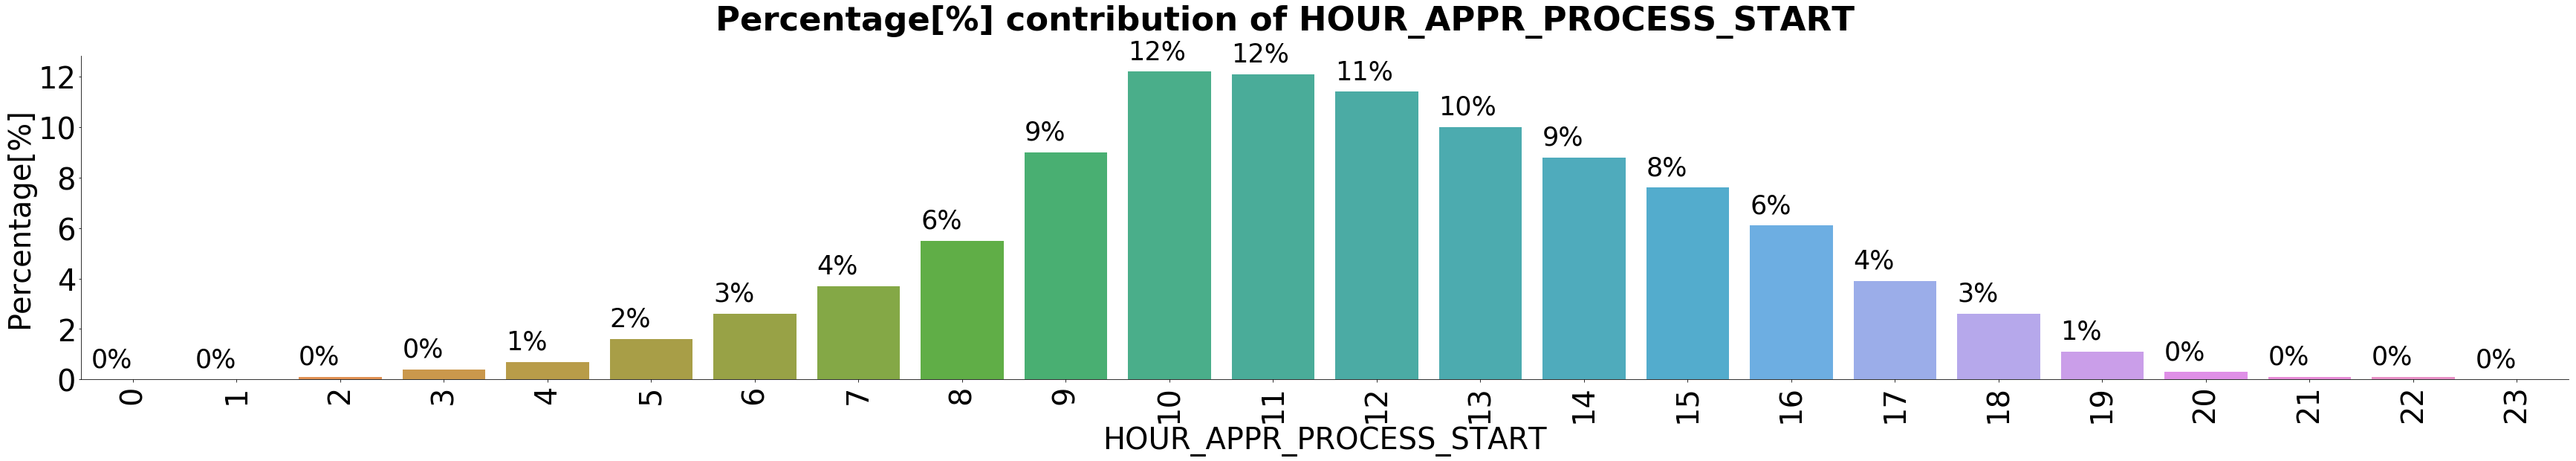


Repayers


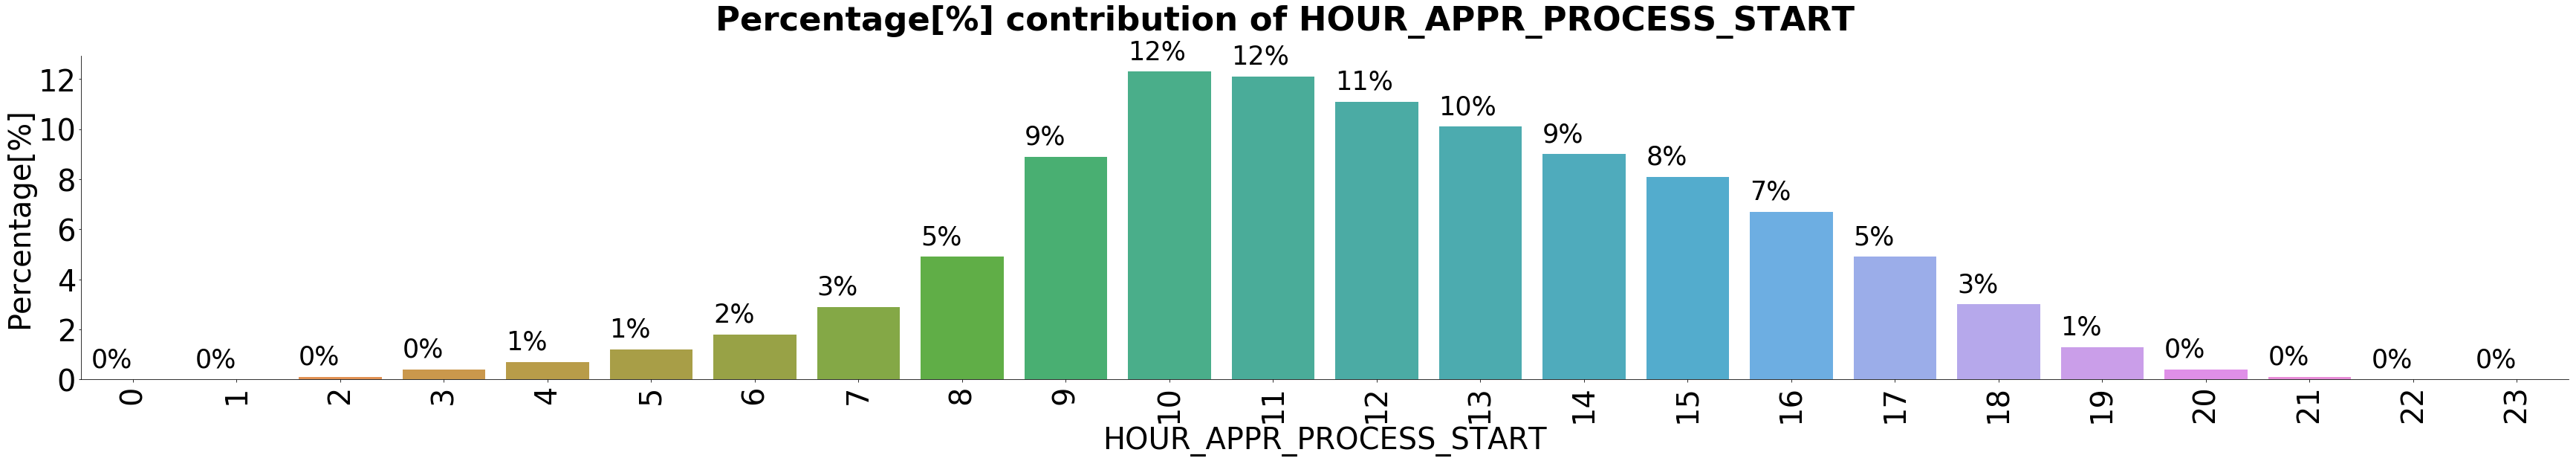

In [112]:
print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)
Single_Categorical_data_bar(data_Fil_Def,'HOUR_APPR_PROCESS_START','Percentage[%]',1,(60,8),40,45,35,1)

print('\n'+'\033[1m'+'\033[94m'+'\033[4m'+'Repayers')
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)
Single_Categorical_data_bar(data_Fil_Non_Def,'HOUR_APPR_PROCESS_START','Percentage[%]',1,(60,8),40,45,35,1)

In [113]:
print(list_of_REGION_CITY_col)

['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


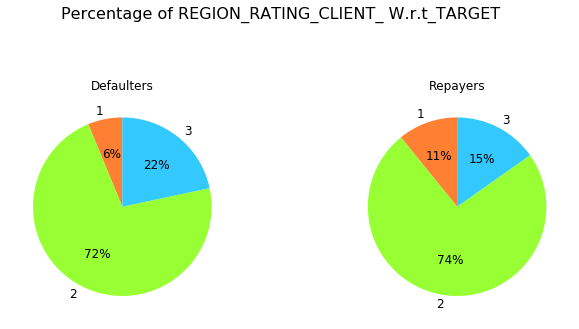

Note:- REGION_RATING_CLIENT_percentage contribution with in DEFAULTERS & REPAYERS 



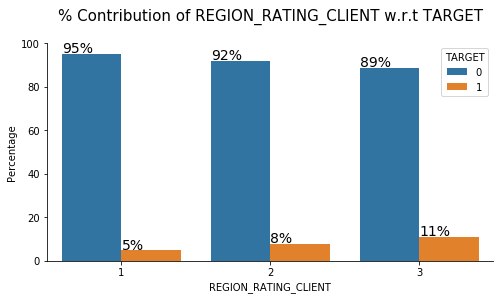

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REGION_RATING_CLIENT 



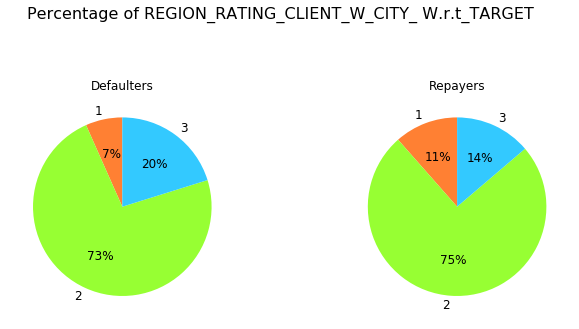

Note:- REGION_RATING_CLIENT_W_CITY_percentage contribution with in DEFAULTERS & REPAYERS 



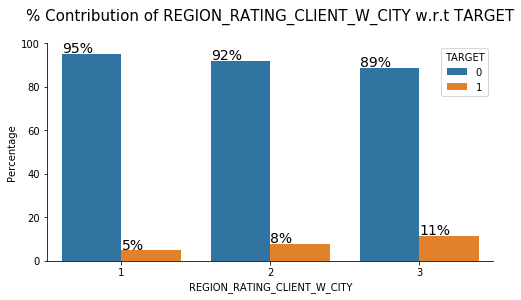

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REGION_RATING_CLIENT_W_CITY 



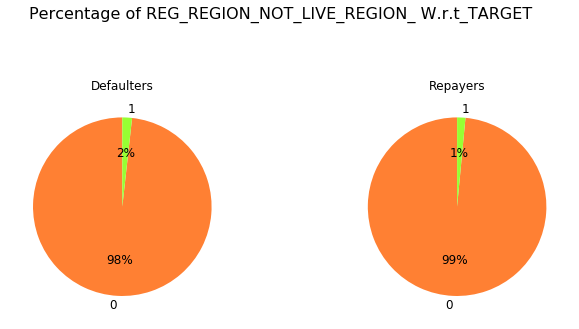

Note:- REG_REGION_NOT_LIVE_REGION_percentage contribution with in DEFAULTERS & REPAYERS 



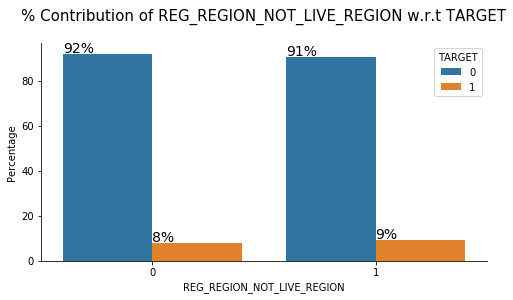

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REG_REGION_NOT_LIVE_REGION 



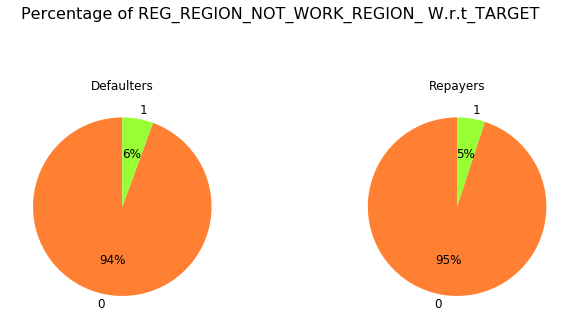

Note:- REG_REGION_NOT_WORK_REGION_percentage contribution with in DEFAULTERS & REPAYERS 



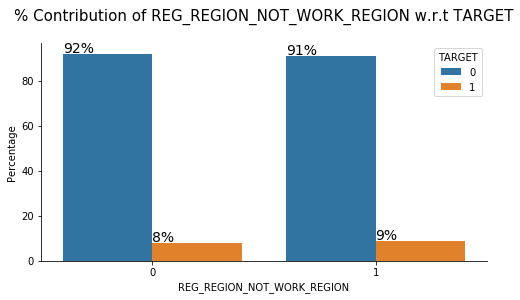

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REG_REGION_NOT_WORK_REGION 



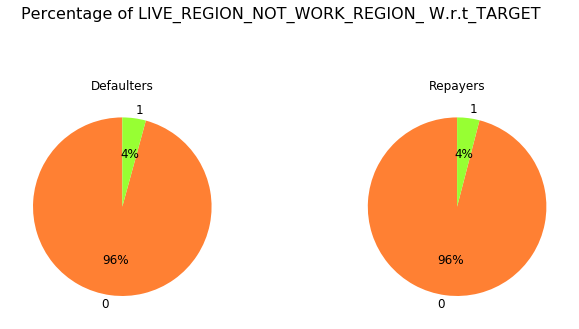

Note:- LIVE_REGION_NOT_WORK_REGION_percentage contribution with in DEFAULTERS & REPAYERS 



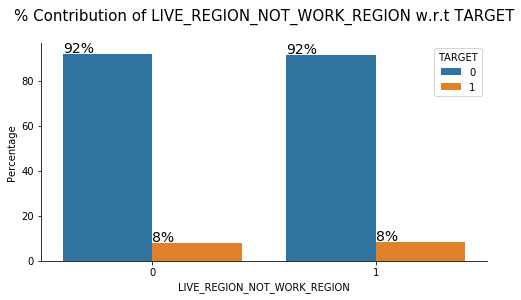

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to LIVE_REGION_NOT_WORK_REGION 



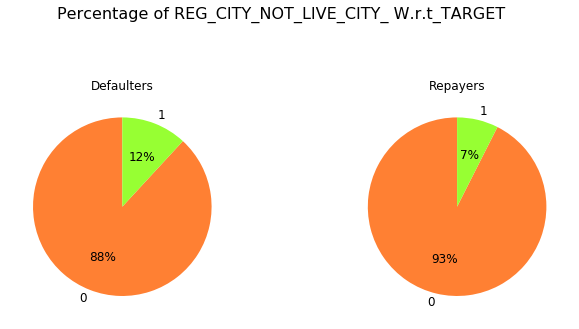

Note:- REG_CITY_NOT_LIVE_CITY_percentage contribution with in DEFAULTERS & REPAYERS 



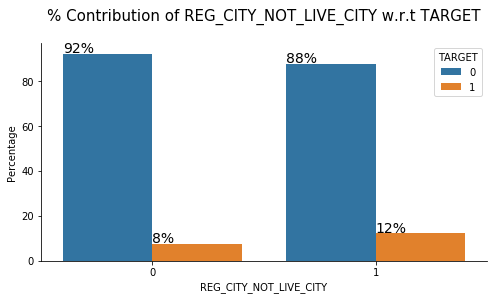

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REG_CITY_NOT_LIVE_CITY 



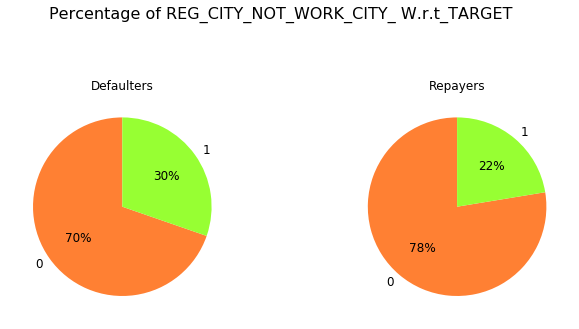

Note:- REG_CITY_NOT_WORK_CITY_percentage contribution with in DEFAULTERS & REPAYERS 



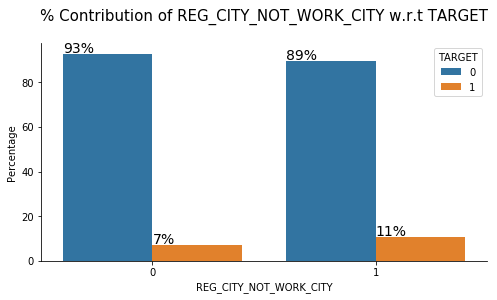

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to REG_CITY_NOT_WORK_CITY 



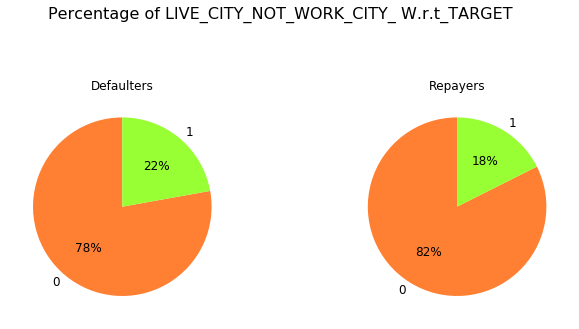

Note:- LIVE_CITY_NOT_WORK_CITY_percentage contribution with in DEFAULTERS & REPAYERS 



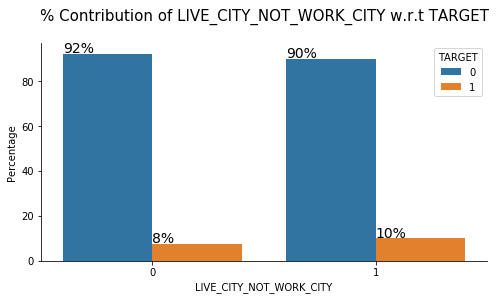

Note:- DEFAULTERS & REPAYERS percentage contribution with respect to LIVE_CITY_NOT_WORK_CITY 



In [114]:
for i in list_of_REGION_CITY_col:

#categorical_var_w_r_t_hue(df,column_name,En_pie,hue,
#                              En_annot,annot_size,fig_size,subtitle_font,title_font,xlable_deg,En_OrderCat)
    
    categorical_var_w_r_t_hue(data_Fil,i,1,'TARGET',1,12,(10,8),12,16,90,0)
    print('\033[1m'+'\033[94m'+'Note:- ' +i+ '_percentage contribution with in DEFAULTERS & REPAYERS \n')
    #barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
    barplot_wrt_hue(data_Fil,i,'TARGET',(8,4),15,14,0,0)
    print('\033[1m'+'\033[94m'+'Note:- DEFAULTERS & REPAYERS percentage contribution with respect to '+i+ ' \n')

* ***defaulters are slightly higher to the clients who's Registered city is different than living city and also living city is different than working city***
* ***Region rating showing relation with respect to defaulters. Least the rating of region shows more defaulters, in this case rating 3 having more defaulters than 1 & 2***

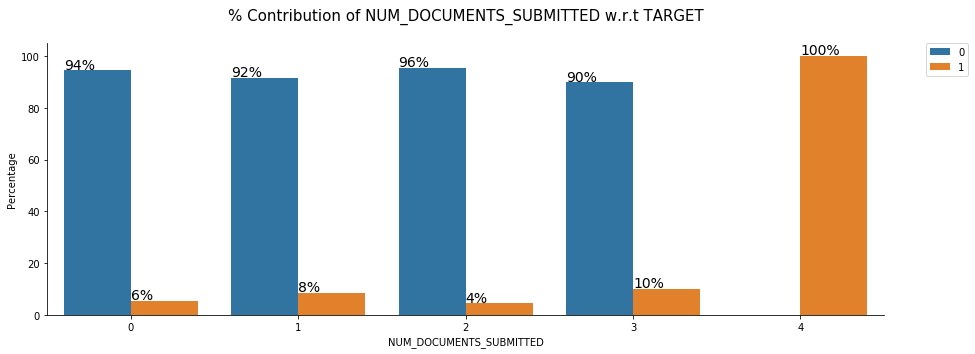

In [115]:
 # Percentage contribution of NUM_DOCUMENTS_SUBMITTED with respect to TARGET
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_Fil,'NUM_DOCUMENTS_SUBMITTED','TARGET',(15,5),15,14,0,1)

* ***there is no significant pattern with respect to defaulters***

Defaulters


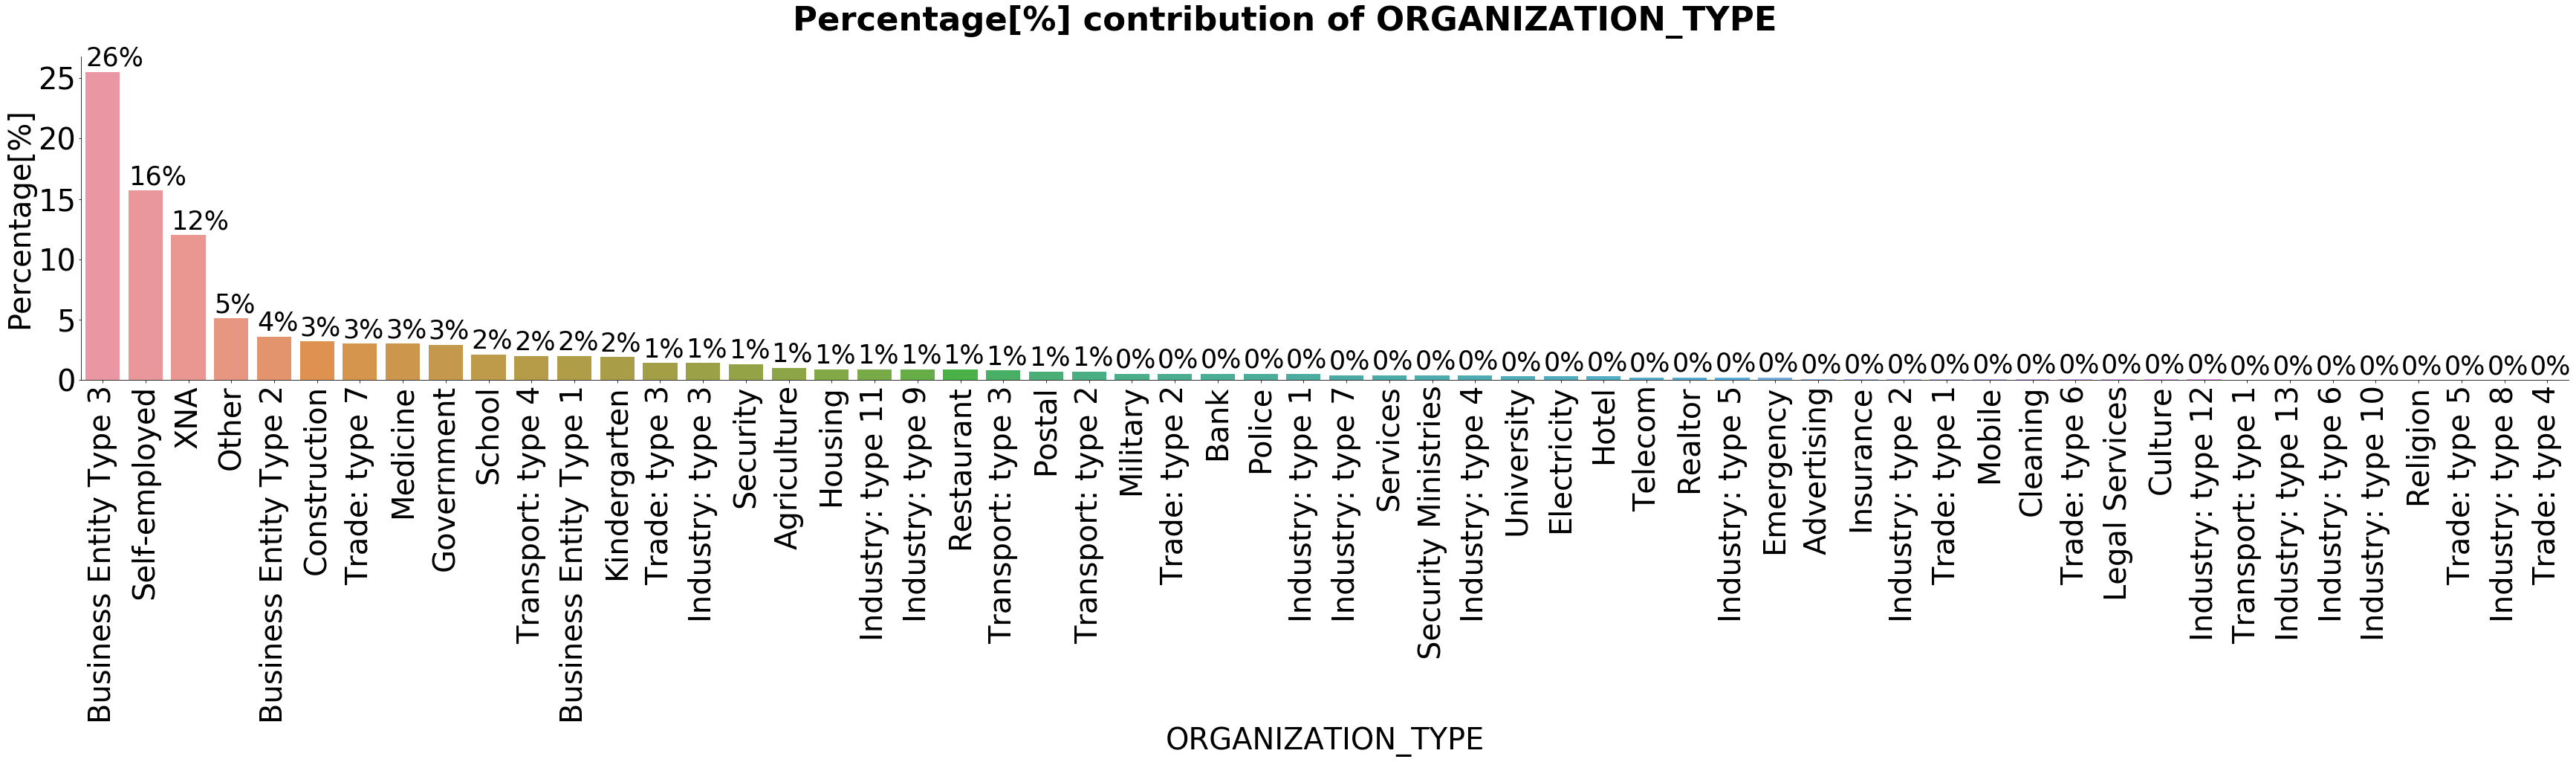

Repayers


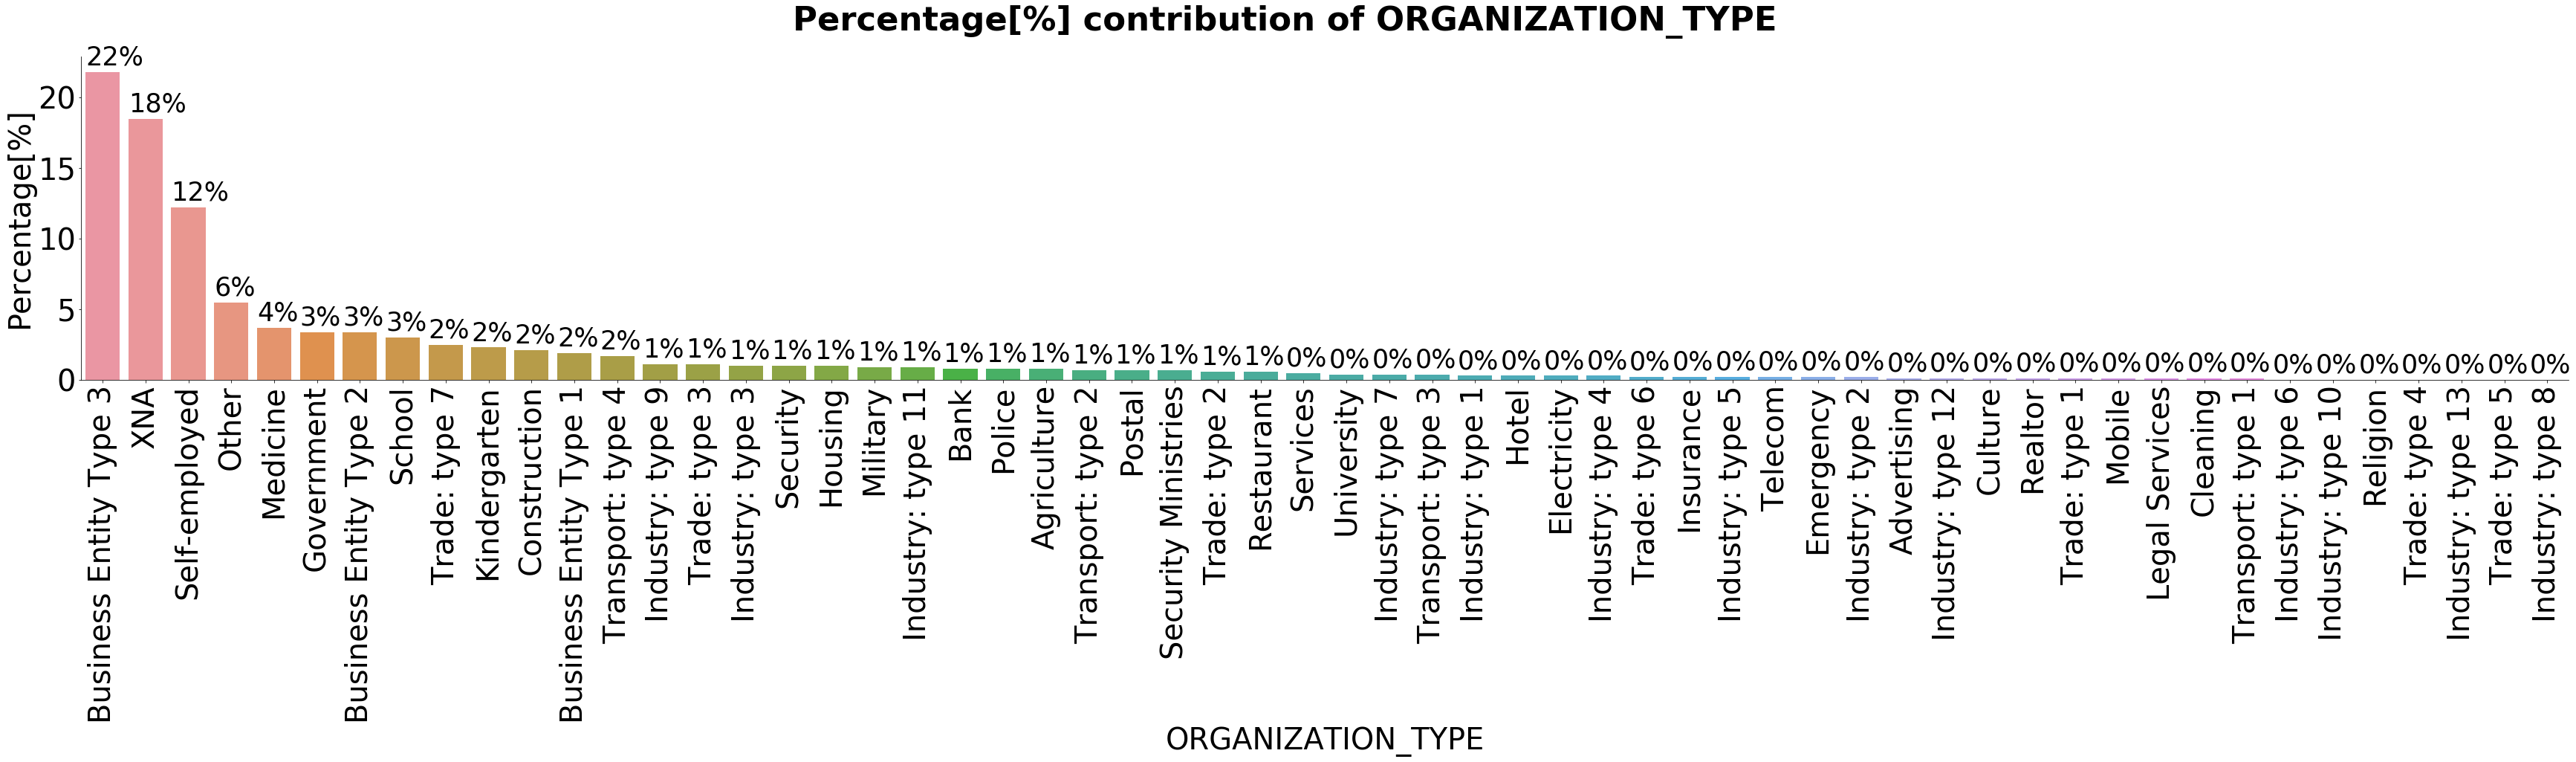

In [116]:
print('\033[1m'+'\033[94m'+'\033[4m'+'Defaulters')
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)
Single_Categorical_data_bar(data_Fil_Def,'ORGANIZATION_TYPE','Percentage[%]',1,(60,8),40,45,35,1)

print('\033[1m'+'\033[94m'+'\033[4m'+'Repayers')
# Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)
Single_Categorical_data_bar(data_Fil_Non_Def,'ORGANIZATION_TYPE','Percentage[%]',1,(60,8),40,45,35,1)

* ***Organization types not really shows the correlation with defaulters***

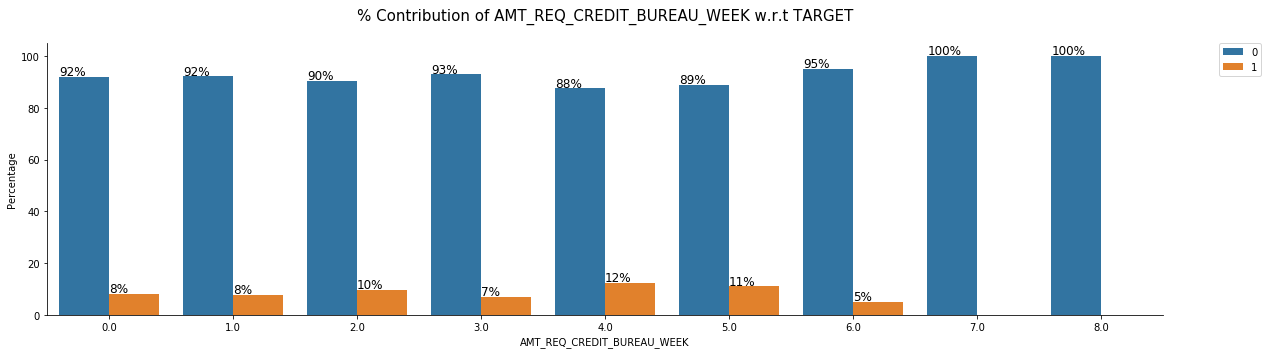

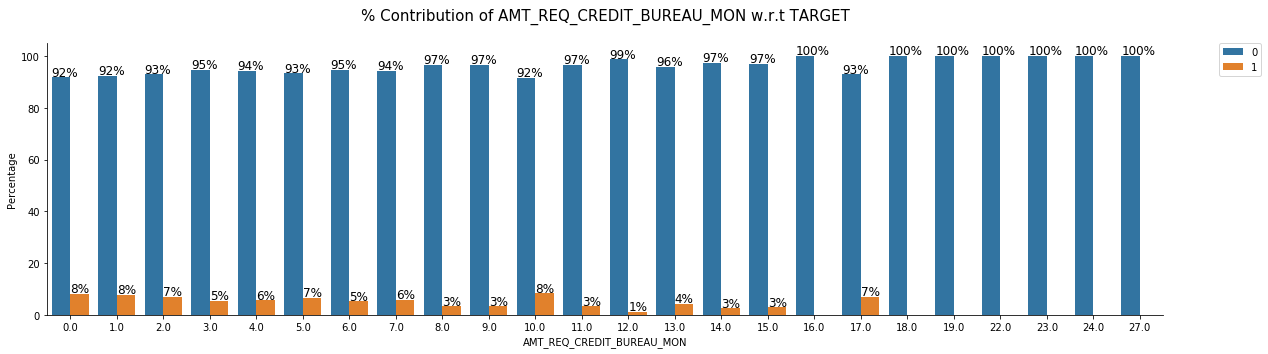

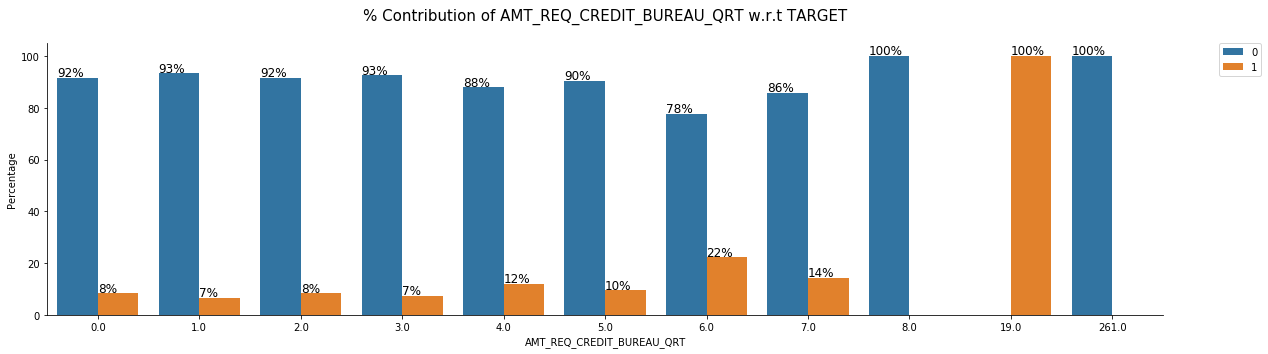

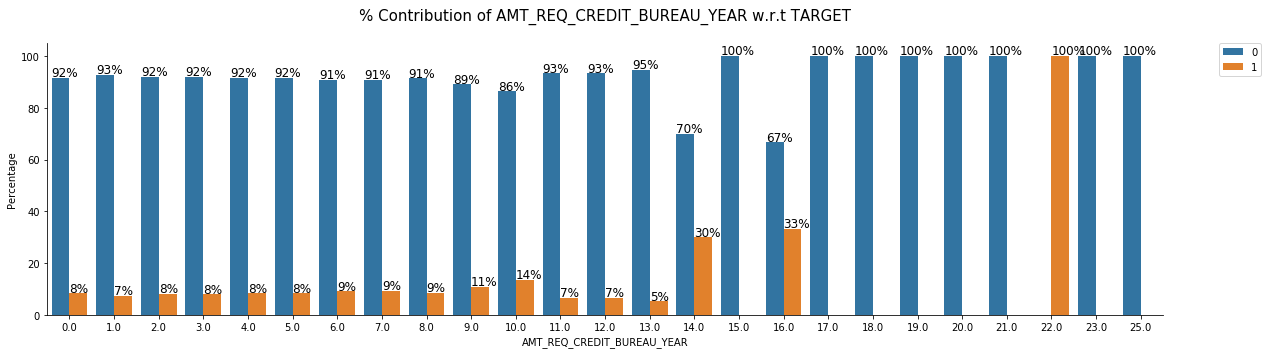

In [117]:
# ==>transform_df_with_perc_calc_barplot(df,column_name,hue,En_OrderCat)
list_of_REQ_col = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in list_of_REQ_col:
    
    #barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
    barplot_wrt_hue(data_Fil,i,'TARGET',(20,5),15,12,0,1)

* ***More number of queries in the span of quarter and annual, leads more chances of default the loan by client. So it is better to make a caution while accepting loan to clients if the more number of queries registered on that client***  

In [118]:
data_Fil_col_list = data_Fil.columns
list_of_yrs_col = [s for s in data_Fil_col_list if 'YEAR' in s]
print(list_of_yrs_col)

['YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 'YEAR_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']


YEAR_BIRTH_Percentage of filtered out data :  0.0
YEAR_EMPLOYED_Percentage of filtered out data :  18.31
YEAR_REGISTRATION_Percentage of filtered out data :  0.35
YEAR_ID_PUBLISH_Percentage of filtered out data :  0.0


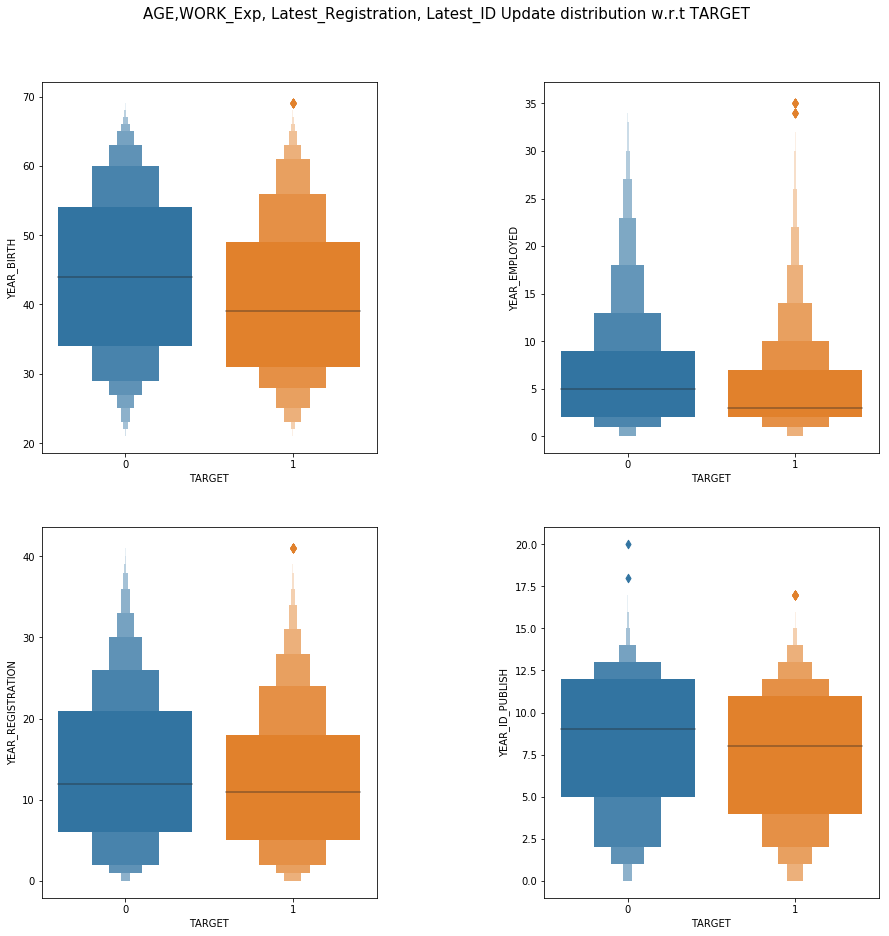

In [119]:
years_col_list = ['YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH']
fig, axes = plt.subplots(2,2, figsize= (15,15))
count = 0
for i in data_Fil[years_col_list].columns:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//2, count%2]
    sns.lvplot(x = 'TARGET', y = i, data = df,ax = ax)
    count+=1
    print(i+'_Percentage of filtered out data : ',round((1-(len(df.index)/len(data_Fil.index)))*100,2))
fig.suptitle('AGE,WORK_Exp, Latest_Registration, Latest_ID Update distribution w.r.t TARGET',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjsut spaces between subplots width and height 

* ***Age highly correlated with young people. Age below 35, possibility of having defaulters higher***
* ***With Less work experience there is chance of more defaulters***
* ***approximately less than one year update of ID and registration makes more probability of having defaulters***

YEAR_BIRTH_Percentage of filtered out data :  0.0
YEAR_EMPLOYED_Percentage of filtered out data :  18.31
YEAR_REGISTRATION_Percentage of filtered out data :  0.35
YEAR_ID_PUBLISH_Percentage of filtered out data :  0.0


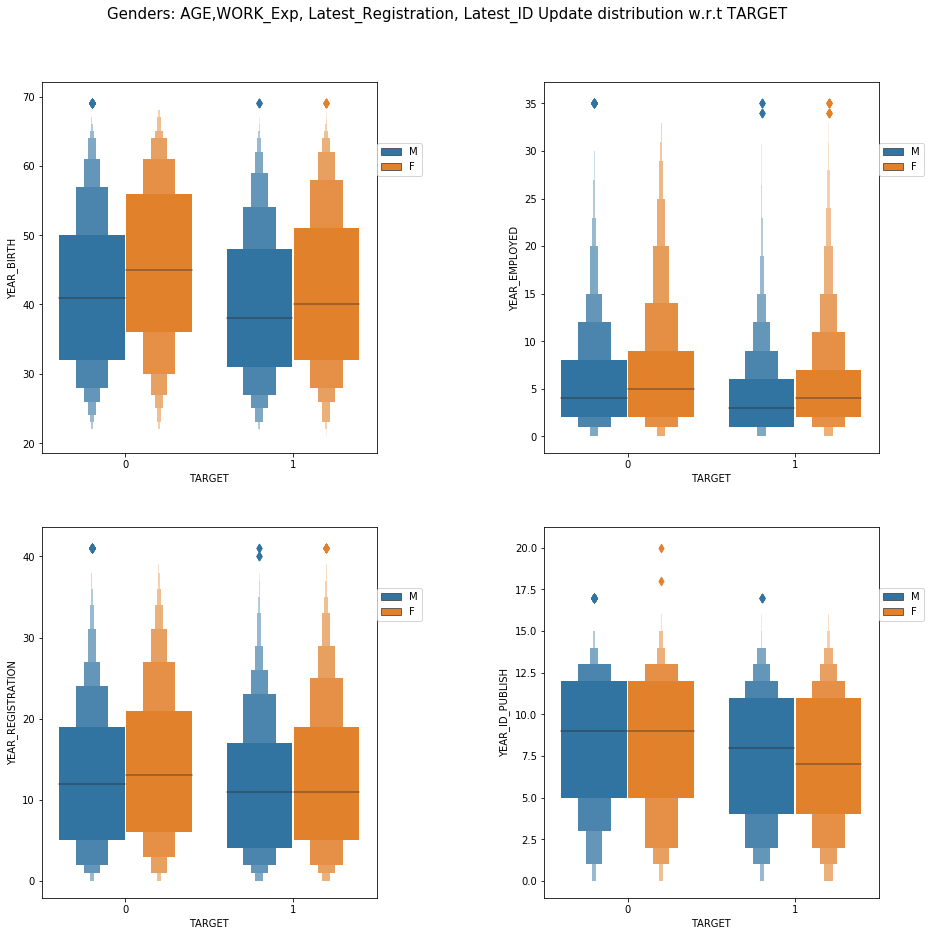

In [120]:
years_col_list = ['YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH']
fig, axes = plt.subplots(2,2, figsize= (15,15))
count = 0
for i in data_Fil[years_col_list].columns:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//2, count%2]
    sns.lvplot(x = 'TARGET', y = i, data = df, hue = 'CODE_GENDER',ax = ax)
    count+=1
    ax.legend(loc='top left', bbox_to_anchor=(1.15, 0.85), ncol=1)
    print(i+'_Percentage of filtered out data : ',round((1-(len(df.index)/len(data_Fil.index)))*100,2))
fig.suptitle('Genders: AGE,WORK_Exp, Latest_Registration, Latest_ID Update distribution w.r.t TARGET',
             fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjsut spaces between subplots width and height 

**Checking key insights of amount of target variables w.r.t to gender.**
* ***more difficulties for the younger males than younger females***
* ***more difficulties for least work experience males than females***
* ***slightly higher difficulties for males who recently made registration, than female, but when considering the older registration females tends to make more payment difficulties than males***
* ***more difficulties to females having recent ID publish than males.***

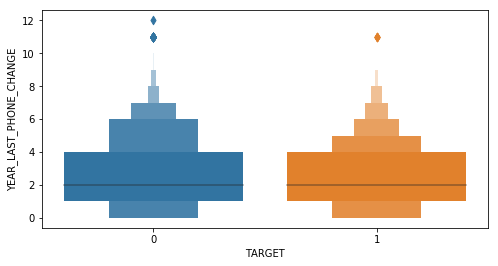

In [121]:
plt.figure(figsize = (8,4))
sns.lvplot(x = 'TARGET', y = 'YEAR_LAST_PHONE_CHANGE', data = data_Fil)
plt.show()

* ***Loan payment difficulties are less if the phone change duration is high***

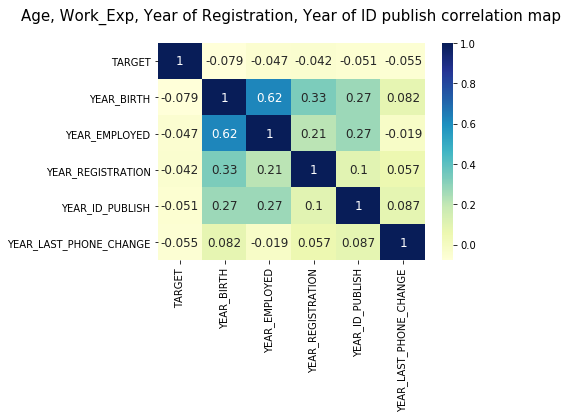

In [122]:
Age_Col_list = ['TARGET','YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH','YEAR_LAST_PHONE_CHANGE']
sns.heatmap(data_Fil[Age_Col_list].corr(),annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')
plt.title('Age, Work_Exp, Year of Registration, Year of ID publish correlation map\n',fontsize = 15)
plt.show()

* ***Correlation between age,ID publish ,work experience & year registration is higher*** 

AMT_INCOME_TOTAL_Percentage of filtered out data :  4.56
AMT_CREDIT_Percentage of filtered out data :  2.12
AMT_ANNUITY_Percentage of filtered out data :  2.44
AMT_GOODS_PRICE_Percentage of filtered out data :  4.78


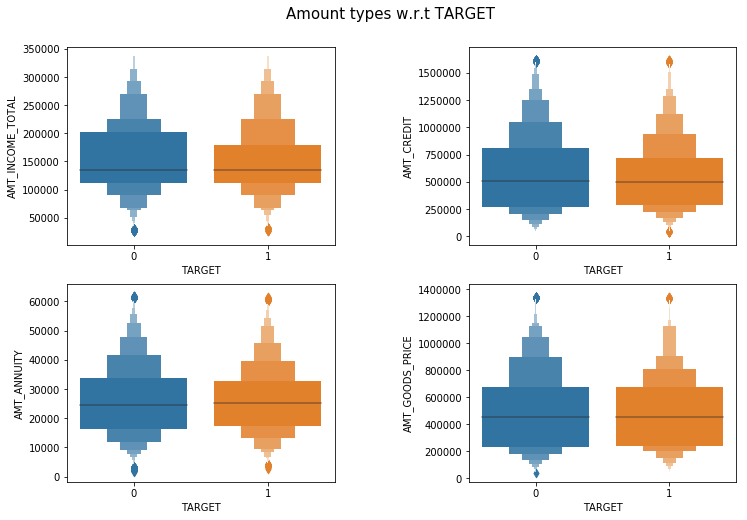

In [123]:
# Biveriate analysis after removing outliers / extrem values 

Amount_Types = ['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
fig, axes = plt.subplots(2,2, figsize= (12,8))
count = 0
for i in data_Fil[Amount_Types].columns[1:]:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//2, count%2]
    sns.lvplot(x = 'TARGET', y = i, data = df, ax = ax)
    count+=1
    print(i+'_Percentage of filtered out data : ',round((1-(len(df.index)/len(data_Fil.index)))*100,2))
fig.suptitle('Amount types w.r.t TARGET',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjsut spaces between subplots width and height  

* ***payment difficulties are less with higher credit amount***

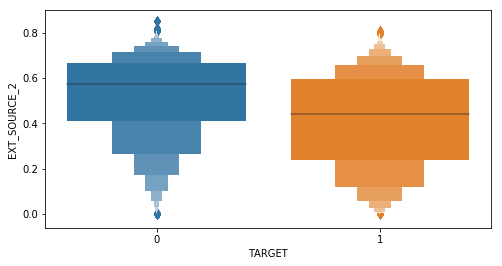

In [124]:
plt.figure(figsize = (8,4))
sns.lvplot(x = 'TARGET', y = 'EXT_SOURCE_2', data = data_Fil)
plt.show()

* ***It is highly correlated, not having external source of income tends to make more difficulties to payments***

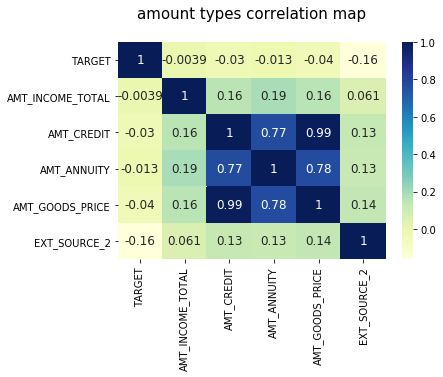

In [125]:
AMT_Col_list = ['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2']
for i in AMT_Col_list:
    df_AMT = filter_OutLiers(data_Fil,i).copy()
sns.heatmap(df_AMT[AMT_Col_list].corr(),annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')
plt.title('amount types correlation map\n',fontsize = 15)
plt.show()

* ***External source of income highly negative correlated with target, means having less or no external income leads payment difficulties for the client*** 
* ***Credit is highly correlated with GOODS price. and the correlation of loan amounts, annuity and goods prince with income is significantly less with respect to TARGET, correlation with total income  and annuity shows positive. For income, there are some possibilities of having defaulters with higher income. But not all cases. And with respect to annuity, higher the annuity more possibility of default the loan***

* ***External source income highly correlated with target. Less or no external source income leads to payment difficulties to the client***

AMT_INCOME_TOTAL_Percentage of filtered out data :  4.56
AMT_CREDIT_Percentage of filtered out data :  2.12
AMT_ANNUITY_Percentage of filtered out data :  2.44
AMT_GOODS_PRICE_Percentage of filtered out data :  4.78


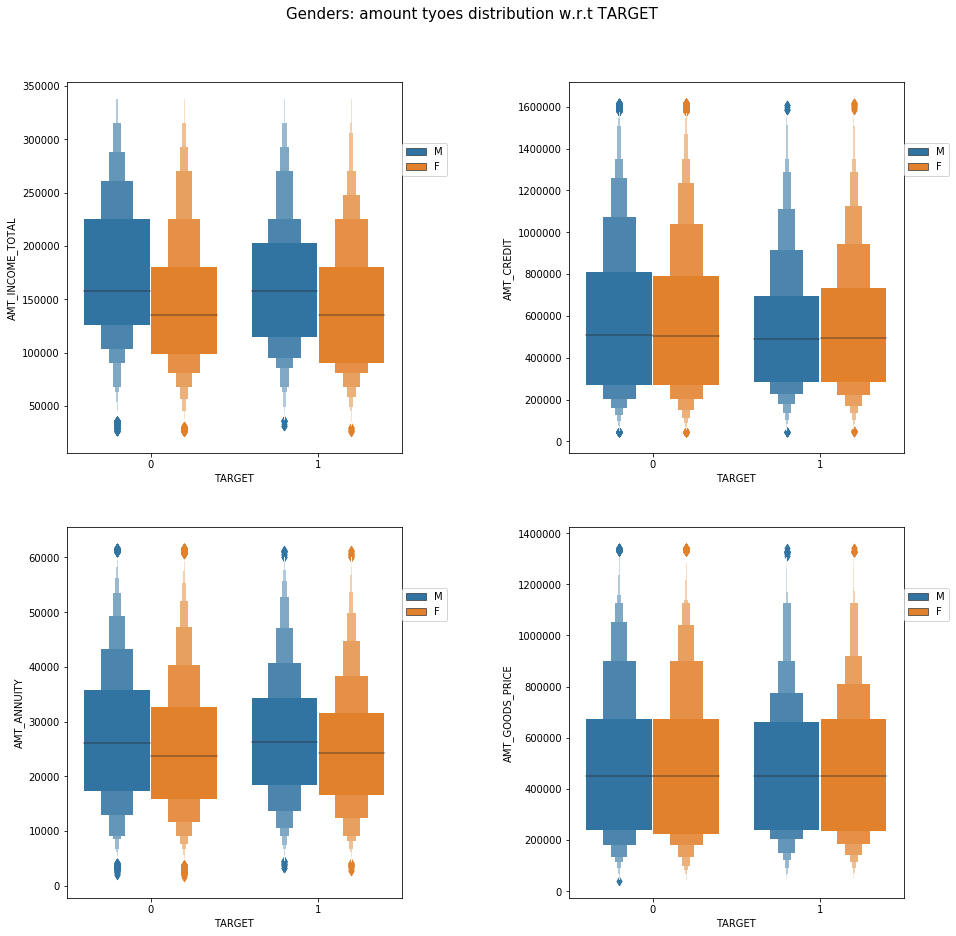

In [126]:
Amount_Types = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
fig, axes = plt.subplots(2,2, figsize= (15,15))
count = 0
for i in data_Fil[Amount_Types].columns:
    df = filter_OutLiers(data_Fil,i).copy()
    ax = axes[count//2, count%2]
    sns.lvplot(x = 'TARGET', y = i, data = df, hue = 'CODE_GENDER',ax = ax)
    count+=1
    ax.legend(loc='top left', bbox_to_anchor=(1.15, 0.85), ncol=1)
    print(i+'_Percentage of filtered out data : ',round((1-(len(df.index)/len(data_Fil.index)))*100,2))
fig.suptitle('Genders: amount tyoes distribution w.r.t TARGET',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.5,hspace=0.2 ) # adjsut spaces between subplots width and height 

* ***there is no big key observation with respect to gender in this case***

In [127]:
data_Fil_col_list = data_Fil.columns
list_of_cnt_col = [s for s in data_Fil_col_list if 'CNT' in s]
print(list_of_cnt_col)

['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


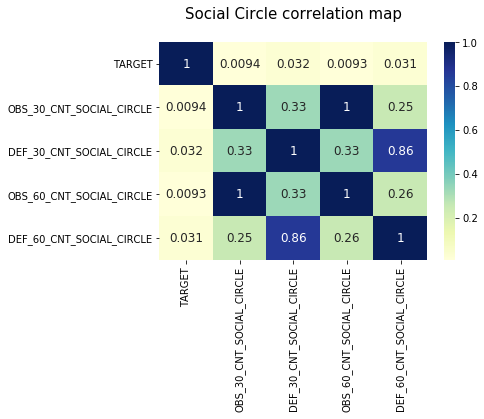

In [128]:
social_circle_list = ['TARGET','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                      'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

sns.heatmap(data_Fil[social_circle_list].corr(),annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')
plt.title('Social Circle correlation map\n',fontsize = 15)
plt.show()

* ***there is some influence of these variables on Target, but highly correlated compared to others variables. like age, external income & work experience***
* ***Correlation between DEF 30 CNT & DEF 60 CNT is high***

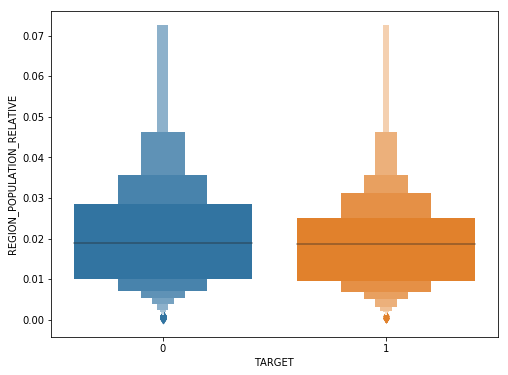

In [129]:
plt.figure(figsize = (8,6))
sns.lvplot(x = 'TARGET', y = 'REGION_POPULATION_RELATIVE', data = data_Fil)
plt.show()

* ***Higher population living area clients having less payment difficulties***

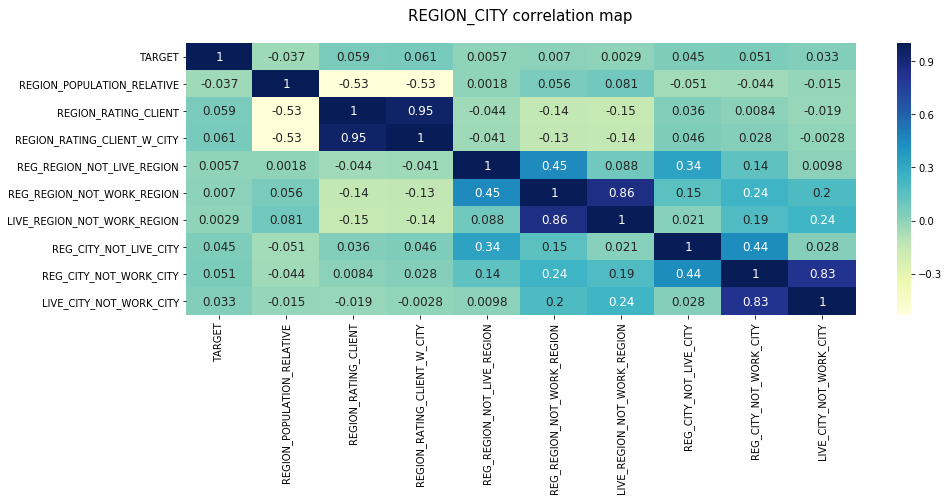

In [130]:
REGION_CITY_COl = ['TARGET','REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
plt.figure(figsize = (15,5))
sns.heatmap(data_Fil[REGION_CITY_COl].corr(),annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')
plt.title('REGION_CITY correlation map\n',fontsize = 15)
plt.show()

* ***Region_Rating_Client & Region_rating_Client_with_City are higly correlated with target. Least rating having higher probability of payment difficulties to the client***
* **and also if the registered city not living or working city makes more difficulties to make loan payment. This makes sense if the registered city not the living or working, some expenses might increase therefore that could lead to payment difficulties towards loan.*** 
* ***REGION_POPULATION_RELATIVE --> client from more population having less possibility to make payment difficulties***


In [131]:
data_Fil_col_list = data_Fil.columns
list_of_req_col = [s for s in data_Fil_col_list if 'REQ' in s]
print(list_of_req_col)

['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


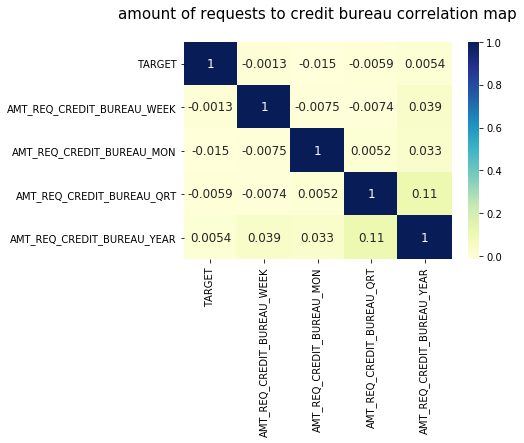

In [132]:
list_of_req_col = ['TARGET','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
#plt.figure(figsize = (15,5))
sns.heatmap(data_Fil[list_of_req_col].corr(),annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')
plt.title('amount of requests to credit bureau correlation map\n',fontsize = 15)
plt.show()

# Conclusions:
### List of business driving parameters
#### 1. EXT_SOURCE_2 ( no or less external income leads payment difficulties )
#### 2. Client's AGE ( younger's have more payment difficulties than orders )
#### 3. REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT ( rating 1--> least payment difficulties , rating 3 --> most 
#### payment difficulties)
#### 4. YEAR_LAST_PHONE_CHANGE (Loan payment difficulties are less if the phone change duration is high)
#### 5. REG_CITY_NOT_WORK_CITY  (Registered city of the client is not same as working city , which leads payment difficulties)
#### 6. ID publish (Less period or recent update of ID makes correlation of making more difficulties to pay loan amount )
#### 7. REG_CITY_NOT_LIVE_CITY (registered city not same as living city correlate more payment difficulties)
#### 8.Work experience (lower the work experience leads payment difficulties than higher work experience clients)
#### 9. DATE_REGISTRATION (recent registrations make tends to more difficulties to make payments)
#### 10. REGION_POPULATION_RELATIVE (Higher population living area clients having less payment difficulties)


# Previous data Analysis :

In [133]:
data_prev = pd.read_csv('previous_application.csv') # load previous application data

In [134]:
# checking missing values percentage
data_prev_missing_list = (data_prev.isnull().sum()/len(data_prev.index)*100).round(2).sort_values(ascending=False)

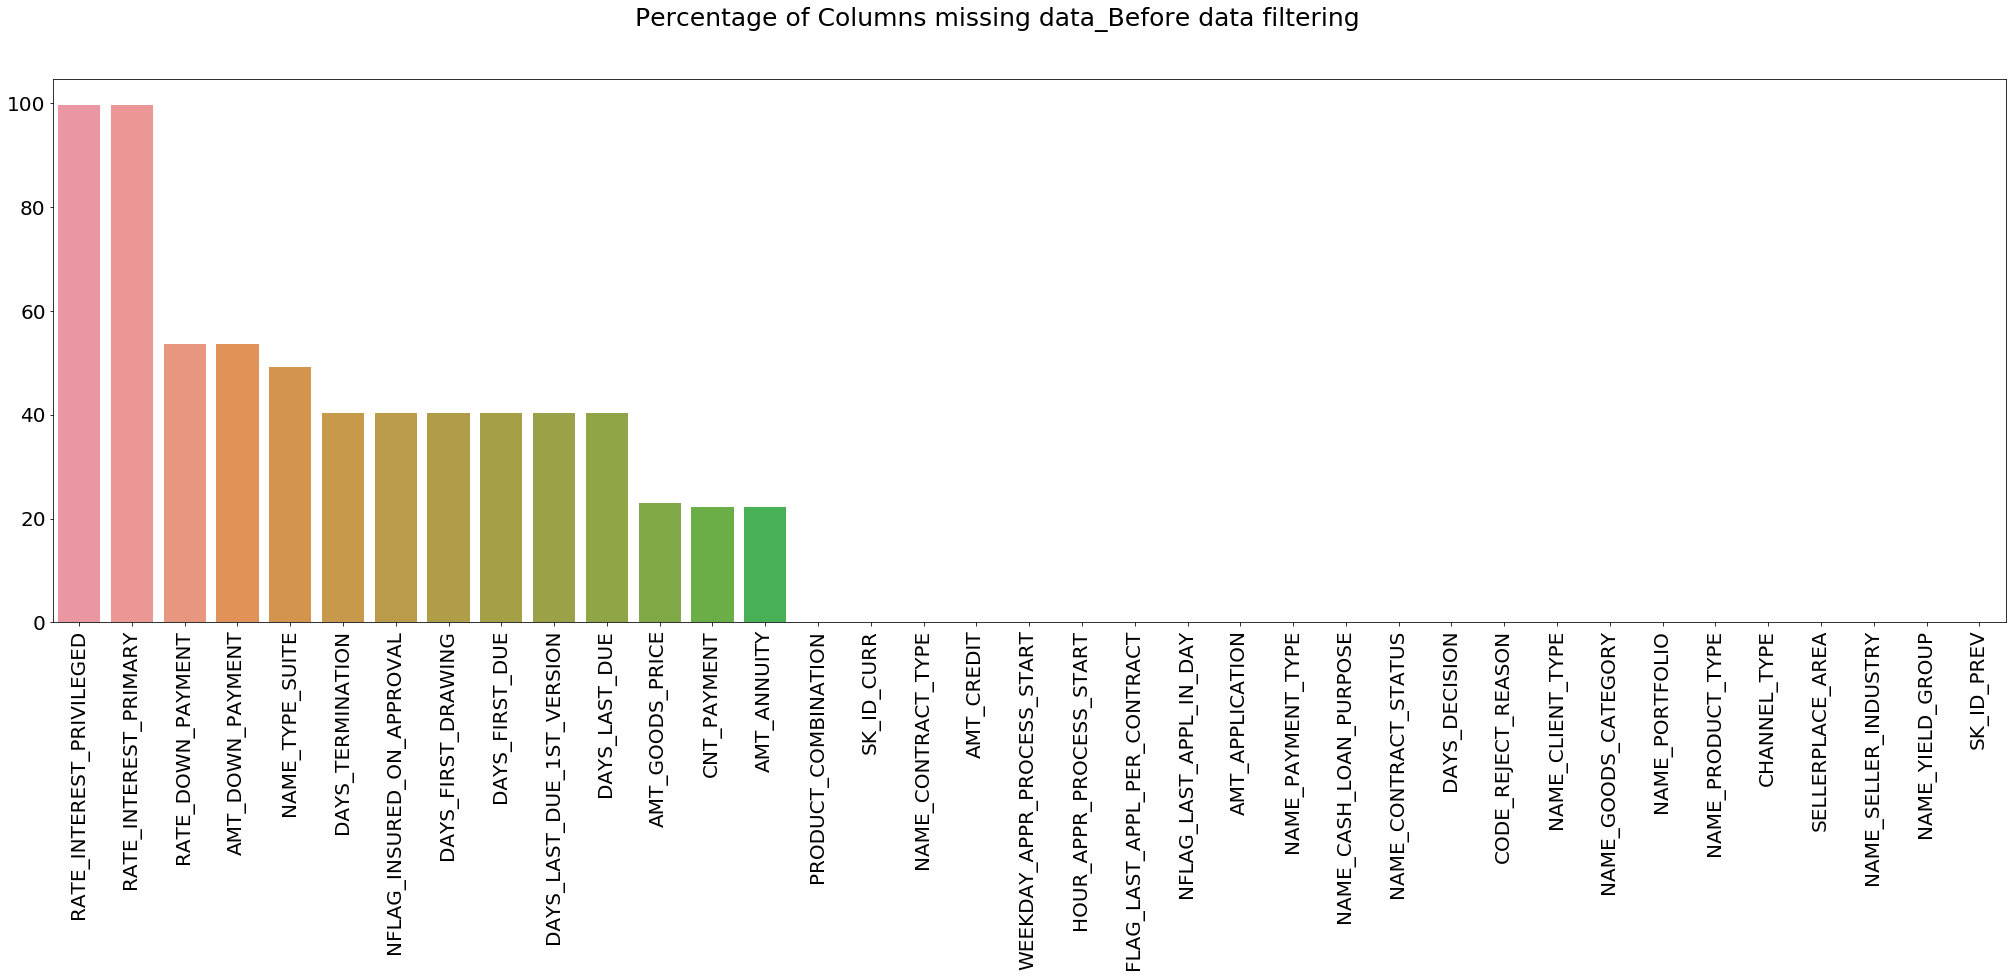

In [135]:
# plot the original data_prev set missing values percentage 
plt.figure(figsize = (35,10))
fig = sns.barplot(x = data_prev_missing_list.index, y = data_prev_missing_list.values)
plt.xticks(rotation=90)
plt.suptitle('Percentage of Columns missing data_Before data filtering', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [136]:
# Consider only up to 25% missing values list 
data_prev_fil_col_list = data_prev_missing_list<25

In [137]:
# remove all columns having missing data more than 25%
data_prev_Fil = data_prev.loc[:,data_prev_fil_col_list] 

In [138]:
# removed all null values , since remaining is missing values contribution very less in percentage.
data_prev_Fil.dropna(how = 'any',inplace = True) 

In [139]:
print('Application dataset shape, Before filtering missing value : ', data_prev.shape)
print('Application dataset shape, After filtering missing value : ', data_prev_Fil.shape)

Application dataset shape, Before filtering missing value :  (1670214, 37)
Application dataset shape, After filtering missing value :  (1246320, 26)


In [140]:
data_prev_Fil.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [141]:
# as per the problem description, FLAG_LAST_APPL_PER_CONTRACT columns having information with N for duplicate applications
data_prev_Fil['FLAG_LAST_APPL_PER_CONTRACT'].describe()

count     1246320
unique          2
top             Y
freq      1242858
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: object

In [142]:
# removing FLAG_LAST_APPL_PER_CONTRACT==N from the data set.
data_prev_Fil = data_prev_Fil.loc[~(data_prev_Fil['FLAG_LAST_APPL_PER_CONTRACT']=='N'),:] 

In [143]:
print('Application dataset shape, Before filtering missing value : ', data_prev.shape)
print('Application dataset shape, After filtering missing value : ', data_prev_Fil.shape)

Application dataset shape, Before filtering missing value :  (1670214, 37)
Application dataset shape, After filtering missing value :  (1242858, 26)


In [144]:
# slice the data_Fil and create new data frame with CURR ID and TARGET variable
data_Fil_Target_var = data_Fil[['SK_ID_CURR', 'TARGET']]

In [145]:
# merege both application data with Target variables & previous application data
data_merge = pd.merge(data_Fil_Target_var, data_prev_Fil, on='SK_ID_CURR') 

In [146]:
# checking missing values percentage
data_merge_missing_list = (data_merge.isnull().sum()/len(data_merge.index)*100).round(2).sort_values(ascending=False)
data_merge_missing_list

PRODUCT_COMBINATION            0.0
NAME_CASH_LOAN_PURPOSE         0.0
TARGET                         0.0
SK_ID_PREV                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CONTRACT_STATUS           0.0
NAME_YIELD_GROUP               0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
SK_ID_CURR                     0.0
dtype: float64

In [147]:
data_merge['NAME_CONTRACT_STATUS'].describe()

count      1054065
unique           4
top       Approved
freq        845195
Name: NAME_CONTRACT_STATUS, dtype: object

In [148]:
data_merge.shape

(1054065, 27)

In [149]:
data_Fil.shape

(305544, 53)

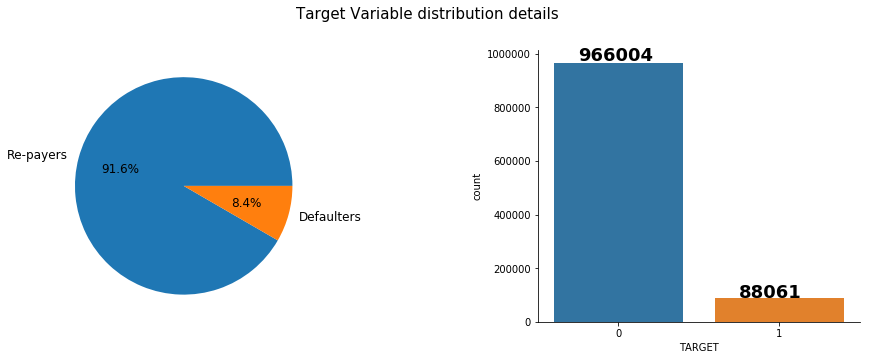

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
fig.suptitle('Target Variable distribution details',fontsize=15, y=1.0)
ax = axes[0]
ax.pie(data_merge['TARGET'].value_counts(), labels= ['Re-payers', 'Defaulters'], 
       autopct = '%1.1f%%',textprops={'size': 'large'}) 

fig1 = sns.countplot(x = 'TARGET', data = data_merge)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in fig1.patches:
    
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    fig1.annotate('{:.0f}'.format(height), (x+0.15, y + height*1.01),fontsize=18,weight='bold')
fig.subplots_adjust(wspace=0.6)
plt.show()

### Target variable distribution :
* **Re-payers is about 92%**
* **Defaulters is about 8%**
* **Ratio between Re-payers Vs Defaulters is 23:2**


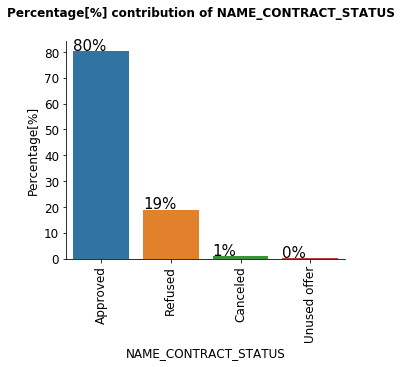

In [151]:
#Single_Categorical_data_bar(df1,x,y,En_annotation,fig_size,ticks_size,title_size,annot_size,En_perc_calc_y)
Single_Categorical_data_bar(data_merge,'NAME_CONTRACT_STATUS','Percentage[%]',1,(5,4),12,12,15,1)

#### Contract Status for approved is about 80%. And refused percentage contribution is about 19%.

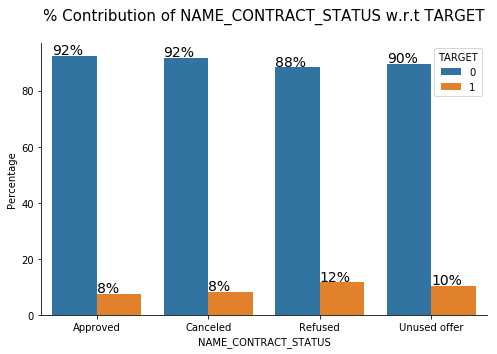

In [152]:
#barplot_wrt_hue(df,column_name,hue,figsize,titlefont,annot_size,En_OrderCat,Enlegend_shift)
barplot_wrt_hue(data_merge,'NAME_CONTRACT_STATUS','TARGET',(8,5),15,14,0,0)

* ***Ideally defaulter’s percentage contribution in approved status and re-payers contribution in refused status should be zero or the lowest possible percentage.***


* ***Approved status having 8% defaulters, this means for about 8% of approved clients are not able to repay the loan amount, and this 8% approved clients lead to make financial loss for the company.***

* ***Refused status having 12% defaulters and remaining 88% are willing to make re-payments, but not approved loans for them. This results business loss to the company.***
